# <font color='green'>Problem Statement</font>
The prevalence of **Autistic Spectrum Disorder (ASD) has been on the rise** and it presents a significant challenge for individuals, their families, and society as a whole. ASD is a developmental disability caused by differences in the brain, which can manifest in difficulties with social communication and interaction, restricted or repetitive behaviors and interests, and unique ways of learning, moving, or paying attention. These characteristics can greatly impact an individual's daily life and make it challenging, even though some people without ASD might also have some of these symptoms. The current screening process for ASD is time-consuming and resource-intensive, and there is a need for a more efficient and accurate model that can leverage Machine Learning techniques on the collected screening data to determine the possibility of ASD in test-takers. This would allow for more efficient identification and support for individuals with ASD and their families.

### <font color='brown'>Dataset Details</font>
The collected <a href="https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult">dataset</a> is of an advanced level and includes screening test information for 704 adults diagnosed with Autistic Spectrum Disorder (ASD). It includes 21 attributes such as demographics of the test takers and 10 questions that were answered in the screening tests. The diagnosis of ASD for each test taker is indicated in the "Class/ASD" variable.

# <font color='green'>Business Objective

**Create a robust classification model** using the attributes provided in the ASD screening dataset **to accurately identify individuals with Autistic Spectrum Disorder (ASD)** from the target variable `'Class/ASD'`

### <font color='purple'>Supress Warnings

In [1]:
##Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### <font color='purple'>Import necessary libraries

In [2]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)       # To display all columns in pandas dataframe
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy
from scipy.io.arff import loadarff as load_arff
from pprint import pprint
import statistics
from statistics import mode
import collections
from collections import Counter

import sklearn
import random
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
## xgboost packages
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

random.seed(0)
np.random.seed(0)

### <font color='purple'>Importing custom modules (project specific)

In [3]:
from helper_functions import *
from model_pipelines import *

# Instantiate 'magic_helper' class
magic_helper_func = magic_helper()

### <font color='purple'>Install necessary libraries

In [4]:
# Install the following package/s, if they are unavailable in the environment
# !pip install statistics

# import os 
# import inspect 
# my_packages_path = os.path.dirname(inspect.getfile(inspect))+"/site-packages"
# !python -m pip install pycountry-convert -t my_packages_path

  Using cached pycountry_convert-0.7.2-py3-none-any.whl (13 kB)
  Using cached pytest_cov-4.0.0-py3-none-any.whl (21 kB)
  Using cached pytest_mock-3.10.0-py3-none-any.whl (9.3 kB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Using cached pytest-7.2.1-py3-none-any.whl (317 kB)
  Using cached repoze.lru-0.7-py3-none-any.whl (10 kB)
  Using cached pycountry-22.3.5-py2.py3-none-any.whl
  Using cached pprintpp-0.4.0-py2.py3-none-any.whl (16 kB)
     ---------------------------------------- 1.1/1.1 MB 4.3 MB/s eta 0:00:00
  Using cached attrs-22.2.0-py3-none-any.whl (60 kB)
  Using cached exceptiongroup-1.1.0-py3-none-any.whl (14 kB)
  Using cached pluggy-1.0.0-py2.py3-none-any.whl (13 kB)
  Using cached iniconfig-2.0.0-py3-none-any.whl (5.9 kB)
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Using cached importlib_metadata-6.0.0-py3-none-any.whl (21 kB)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.6 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
spacy 3.4.4 requires typing-extensions<4.2.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
sagemaker 2.127.0 requires importlib-metadata<5.0,>=1.4.0, but you have importlib-metadata 6.0.0 which is incompatible.
jupyterlab-server 2.17.0 requires jsonschema>=4.17.3, but you have jsonschema 4.16.0 which is incompatible.
confection 0.0.3 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
autogluon-timeseries 0.6.1 requires psutil<5.9,>=5.7.3, but you have psutil 5.9.0 which is incompatible.
autogluon-multimodal 0.6.1 requires jsonschema<=4.8.0, but you have j


     -------------------------------------- 202.0/202.0 kB 6.2 MB/s eta 0:00:00
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)


# <font color='blue'>Step 1: 
## <font color='purple'>Reading and Understanding the `Adults Autism Screening Dataset`

In [5]:
# Using loadarff returns data and metadata
raw_data = load_arff('./Autism Screening Adults Dataset/Autism-Adult-Data.arff')

# 1. Reading the data as a pandas dataframe
df_data = pd.DataFrame(raw_data[0])
df_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',26.0,b'f',b'White-European',b'no',b'no',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',24.0,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',27.0,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',35.0,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',40.0,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,b'18 and more',b'?',b'NO'


In [6]:
# 2. Reading the metadata 
df_meta = list(raw_data[1])
print("List of Variables:\n", df_meta);print()
print("Total No. of Columns:", len(df_meta))

List of Variables:
 ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']

Total No. of Columns: 21


**Observations:**<br>
1. No. of independent features: **20**<br>
2. Target variable: `'Class/ASD'` *indicating (yes/no) Autistic Spectrum Disorder (ASD) cases*

# <font color='blue'>Step 2: 

## <font color='purple'>Data Preparation

### <font color='green'>2.1. Data Cleaning and Manipulation

#### <font color='darkblue'>2.1.1. Checking datatype of variables in the dataset

In [7]:
# Checking datatype of first element (since it seems to be Bytes data)
print(list(df_data['A1_Score'][:1])[0])
print(type(list(df_data['A1_Score'][:1])[0]))

b'1'
<class 'bytes'>


**Observation:**<br>Data values begininning with **b'** indicate `bytes data`.

In [8]:
# Checking the datatype of features in the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    object 
 1   A2_Score         704 non-null    object 
 2   A3_Score         704 non-null    object 
 3   A4_Score         704 non-null    object 
 4   A5_Score         704 non-null    object 
 5   A6_Score         704 non-null    object 
 6   A7_Score         704 non-null    object 
 7   A8_Score         704 non-null    object 
 8   A9_Score         704 non-null    object 
 9   A10_Score        704 non-null    object 
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

#### <font color='darkblue'>2.1.2. Filtering Object Type Data

In [9]:
# Checking all the variables belonging to object dtype (need to be decode byte strings to ordinary strings)
object_dtype_variables_df = df_data.select_dtypes([np.object])
object_dtype_variables = df_data.select_dtypes([np.object]).columns.to_list()
print("Object Datatype Features (Class Bytes):\n", object_dtype_variables);print()

# Display dataframe with only bytes string data
object_dtype_variables_df.head()

Object Datatype Features (Class Bytes):
 ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']



,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'f',b'White-European',b'no',b'no',b'United States',b'no',b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'f',b'White-European',b'no',b'yes',b'United States',b'no',b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',b'f',b'?',b'no',b'no',b'Egypt',b'no',b'18 and more',b'?',b'NO'


#### <font color='darkblue'>2.1.3. Decoding object data type (class: bytes) features

In [10]:
# Decoding object dtype variables -> convert bytes strings to ordinary strings
for i in object_dtype_variables:
    df_data[i] = df_data[i].str.decode('utf-8')
    
# Rechecking the dataset
df_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


####  <font color='darkblue'>2.1.4. Correcting column names as per the data dictionary

In [11]:
# Correcting the column name 'contry_of_res' to 'Country_of_res' (as per the Data Dictionary)
df_data.rename(columns = {'contry_of_res':'Country_of_res'}, inplace = True)

# Title case 
df_data.rename(columns = {'age':'Age', 
                         'gender':'Gender', 
                         'ethnicity':'Ethnicity', 
                         'jundice':'Jundice', 
                         'austim':'Austim', 
                         'used_app_before': 'Used_app_before', 
                         'result':'Result', 
                         'age_desc':'Age_desc', 
                         'relation':'Relation'}, inplace=True)

In [12]:
# Rechecking the datatypes
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    object 
 1   A2_Score         704 non-null    object 
 2   A3_Score         704 non-null    object 
 3   A4_Score         704 non-null    object 
 4   A5_Score         704 non-null    object 
 5   A6_Score         704 non-null    object 
 6   A7_Score         704 non-null    object 
 7   A8_Score         704 non-null    object 
 8   A9_Score         704 non-null    object 
 9   A10_Score        704 non-null    object 
 10  Age              702 non-null    float64
 11  Gender           704 non-null    object 
 12  Ethnicity        704 non-null    object 
 13  Jundice          704 non-null    object 
 14  Austim           704 non-null    object 
 15  Country_of_res   704 non-null    object 
 16  Used_app_before  704 non-null    object 
 17  Result          

In [13]:
# Checking dataset statistics (quantitative variables, so far)
df_data.describe()

,Age,Result
count,702.000000,704.000000
mean,29.698006,4.875000
std,16.507465,2.501493
min,17.000000,0.000000
25%,21.000000,3.000000
50%,27.000000,4.000000
75%,35.000000,7.000000
max,383.000000,10.000000


####  <font color='darkblue'>2.1.5. Datatype conversion: Quantitative attributes - Changing data type of Test Taker Responses (A_Scores)

In [14]:
for i in df_data.columns:
    if i.startswith("A") and i.endswith("_Score"):
        df_data[i] = df_data[i].astype(int)        # Convert 'float' dtype to 'int' (integer values)
    
# Rechecking datatypes of the variables in the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int32  
 1   A2_Score         704 non-null    int32  
 2   A3_Score         704 non-null    int32  
 3   A4_Score         704 non-null    int32  
 4   A5_Score         704 non-null    int32  
 5   A6_Score         704 non-null    int32  
 6   A7_Score         704 non-null    int32  
 7   A8_Score         704 non-null    int32  
 8   A9_Score         704 non-null    int32  
 9   A10_Score        704 non-null    int32  
 10  Age              702 non-null    float64
 11  Gender           704 non-null    object 
 12  Ethnicity        704 non-null    object 
 13  Jundice          704 non-null    object 
 14  Austim           704 non-null    object 
 15  Country_of_res   704 non-null    object 
 16  Used_app_before  704 non-null    object 
 17  Result          

In [15]:
# Dataset shape
df_data.shape

(704, 21)

###  <font color='green'>2.2 Handling missing values and checking for invalid characters in the dataset

#### <font color='darkblue'>2.2.1 Missing values treatment </font>

In [16]:
# Checking for noticeable null values in the dataset 
df_data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
Age                2
Gender             0
Ethnicity          0
Jundice            0
Austim             0
Country_of_res     0
Used_app_before    0
Result             0
Age_desc           0
Relation           0
Class/ASD          0
dtype: int64

####  <font color='darkblue'>2.2.2. Analyzing and altering the records in 'Age' feature column

In [17]:
# Stats of 'Age' feature variable
df_data['Age'].describe()

count    702.000000
mean      29.698006
std       16.507465
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max      383.000000
Name: Age, dtype: float64

In [18]:
# Since there are only two records with 'Age' missing values, dropping them
df_data = df_data.loc[~(df_data.Age.isnull()),:]

In [19]:
# Rechecking for noticeable null values in the dataset (along columns)
count=0
for i in df_data.isnull().sum(axis=0):
    if i!=0:
        count+=1
if count==0:
    print('\033[1m'+"There are no null values present in the dataset.")
else:
    print('\033[1m'+"There are missing values present in the dataset.")

There are no null values present in the dataset.


In [20]:
age_dict = dict(Counter(df_data["Age"]))
age_dict_sorted = {i: age_dict[i] for i in sorted(list(age_dict.keys()))}
print('\033[1m'+"Age data with sample count:\n"+'\033[0m', age_dict_sorted)  

Age data with sample count:
 {17.0: 18, 18.0: 31, 19.0: 35, 20.0: 46, 21.0: 49, 22.0: 37, 23.0: 37, 24.0: 34, 25.0: 27, 26.0: 28, 27.0: 31, 28.0: 24, 29.0: 27, 30.0: 30, 31.0: 21, 32.0: 18, 33.0: 16, 34.0: 12, 35.0: 17, 36.0: 13, 37.0: 17, 38.0: 12, 39.0: 7, 40.0: 16, 41.0: 3, 42.0: 15, 43.0: 11, 44.0: 10, 45.0: 4, 46.0: 6, 47.0: 8, 48.0: 4, 49.0: 3, 50.0: 5, 51.0: 1, 52.0: 5, 53.0: 6, 54.0: 2, 55.0: 6, 56.0: 2, 58.0: 2, 59.0: 1, 60.0: 1, 61.0: 2, 64.0: 1, 383.0: 1}


In [21]:
# Also, '383.0' is an invalid value of 'Age' number. Dropping all the values above 120 (assumed maximum human age)
df_data = df_data.loc[~(df_data.Age>120), :]

# Changing 'Age' datatype from 'float' to 'integer'
df_data['Age'] = df_data.Age.astype(int)

age_dict_new = dict(Counter(df_data["Age"]))
age_dict_sorted_new = {i: age_dict[i] for i in sorted(list(age_dict_new.keys()))}
print('\033[1m'+"Age data (integer) with sample count:\n"+'\033[0m', age_dict_sorted_new) 

Age data (integer) with sample count:
 {17: 18, 18: 31, 19: 35, 20: 46, 21: 49, 22: 37, 23: 37, 24: 34, 25: 27, 26: 28, 27: 31, 28: 24, 29: 27, 30: 30, 31: 21, 32: 18, 33: 16, 34: 12, 35: 17, 36: 13, 37: 17, 38: 12, 39: 7, 40: 16, 41: 3, 42: 15, 43: 11, 44: 10, 45: 4, 46: 6, 47: 8, 48: 4, 49: 3, 50: 5, 51: 1, 52: 5, 53: 6, 54: 2, 55: 6, 56: 2, 58: 2, 59: 1, 60: 1, 61: 2, 64: 1}


####  <font color='darkblue'>2.2.3 Changing the datatype of 'Results' feature column

In [22]:
# Also, changing the 'Result' data type to int (Since values range from 0-10)
df_data['Result'] = df_data.Result.astype(int)

In [23]:
# Checking datatypes
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         701 non-null    int32 
 1   A2_Score         701 non-null    int32 
 2   A3_Score         701 non-null    int32 
 3   A4_Score         701 non-null    int32 
 4   A5_Score         701 non-null    int32 
 5   A6_Score         701 non-null    int32 
 6   A7_Score         701 non-null    int32 
 7   A8_Score         701 non-null    int32 
 8   A9_Score         701 non-null    int32 
 9   A10_Score        701 non-null    int32 
 10  Age              701 non-null    int32 
 11  Gender           701 non-null    object
 12  Ethnicity        701 non-null    object
 13  Jundice          701 non-null    object
 14  Austim           701 non-null    object
 15  Country_of_res   701 non-null    object
 16  Used_app_before  701 non-null    object
 17  Result           701 non-null    in

####  <font color='darkblue'>2.2.4. Checking unique values in remaining object data type columns (To identify categorical variables)

In [24]:
# List of object dtype variables
object_dtype_variables = df_data.select_dtypes([np.object]).columns.to_list()

# Unique values belonging to object datatype variables
magic_helper_func.unique_vals(df=df_data,            
            column_list=object_dtype_variables)

Unique values of 'Gender' variable:' {'f', 'm'}
Number of unique items in 'Gender':'2

Unique values of 'Ethnicity' variable:' {'?', 'White-European', 'South Asian', 'others', 'Latino', 'Middle Eastern ', 'Black', 'Turkish', 'Hispanic', 'Asian', 'Pasifika', 'Others'}
Number of unique items in 'Ethnicity':'12

Unique values of 'Jundice' variable:' {'yes', 'no'}
Number of unique items in 'Jundice':'2

Unique values of 'Austim' variable:' {'yes', 'no'}
Number of unique items in 'Austim':'2

Unique values of 'Country_of_res' variable:' {'Japan', 'Australia', 'Malaysia', 'Italy', 'Pakistan', 'China', 'Netherlands', 'Sweden', 'Portugal', 'Bahamas', 'Bolivia', 'Angola', 'Cyprus', 'Egypt', 'Aruba', 'Azerbaijan', 'India', 'United States', 'Kazakhstan', 'Hong Kong', 'Brazil', 'Spain', 'Iraq', 'Austria', 'Viet Nam', 'Burundi', 'AmericanSamoa', 'New Zealand', 'Bangladesh', 'Canada', 'Germany', 'Ukraine', 'Philippines', 'Iceland', 'Ireland', 'Afghanistan', 'Romania', 'Serbia', 'Indonesia', 'Saudi A

**Observations:**<br>
(1) `'Age_desc'` variable seems to have only one value of **'18 and more'** throughout the column, which is incorrect. This is because the `'Age_desc'` column is dependent on `Age` column, and the `'Age'` column does have **few records belonging to age group of less than 18** (minors)<br>
(2) `'Relation'` and `'Ethnicity'` variables have an **invalid character `'?'`** in their unique value lists respectively<br>
(3) **Incorrect country name representation** in the `Country_of_res` feature column, `AmericanSamoa`

####  <font color='darkblue'>2.2.5. Analyzing the records in 'age_desc' data

In [25]:
# Adding an additional cateogrical value 'Less than 18' for 'Age' group less than 18 records in 'Age_desc' column
df_data['Age_desc'] = np.where(df_data['Age']<18, 'Less than 18', df_data['Age_desc'])

# Checking the number of new labels in the 'Age_desc' data column
df_data['Age_desc'].value_counts()

18 and more     683
Less than 18     18
Name: Age_desc, dtype: int64

####  <font color='darkblue'>2.2.6. Analyzing the records in 'Relation' and 'Ethnicity' feature column `(for Invalid Characters)`

In [26]:
# Checking count of invalid character '?' in 'Relation' feature column
df_data['Relation'].value_counts()

Self                        521
?                            93
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: Relation, dtype: int64

In [27]:
# Checking count of invalid character '?' in 'Ethnicity' feature column
df_data['Ethnicity'].value_counts()

White-European     233
Asian              123
?                   93
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
others               1
Name: Ethnicity, dtype: int64

In [28]:
# Percentage of common records having the same invalid '?' character
print(round(100*len(df_data.loc[((df_data.Relation=='?') & (df_data.Ethnicity=='?')), :])/len(df_data),3),"%")

13.267 %


**Observation:**<br>
(1)The same records in dataset have 'Relation' and 'Ethnicity' data values missing<br>
(2) `'13.267%'` of common records in the dataset have the **'Relation'** and **'Ethnicity'** *data missing*

In [29]:
# Dropping these common records with invalid characters (as it would affect our analysis)
df = df_data.loc[((df_data.Relation!='?') & (df_data.Ethnicity!='?')),:]

# Also, 'Others' and 'others' categorical values in 'Ethnicity should be the same
df['Ethnicity'] = df['Ethnicity'].replace('others', 'Others')

####  <font color='darkblue'>2.2.7. Correcting country name representation of 'AmericanSamoa'

In [30]:
# Correcting country name representation of 'AmericanSamoa'
df["Country_of_res"] = df["Country_of_res"].replace('AmericanSamoa', 'American Samoa')

####  <font color='darkblue'>2.2.8. Derive an additional feature - 'Continent' based on 'Country_of_res' feature

In [31]:
# Retained slightly coarser data at Continent level
df['Continent'] = df['Country_of_res'].apply(lambda x: magic_helper_func.country_to_continent(x))

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Austim,Country_of_res,Used_app_before,Result,Age_desc,Relation,Class/ASD,Continent
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,18 and more,Self,NO,North America
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO,South America
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES,Europe
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO,North America
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,United States,no,9,18 and more,Self,YES,North America


In [32]:
# Dataset shape
print("Size of retained dataset       :", df.shape)

# Percentage of dataset retained
print(f"Percentage of dataset retained : {round(100*len(df)/len(df_data),3)}%")

Size of retained dataset       : (608, 22)
Percentage of dataset retained : 86.733%


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         608 non-null    int32 
 1   A2_Score         608 non-null    int32 
 2   A3_Score         608 non-null    int32 
 3   A4_Score         608 non-null    int32 
 4   A5_Score         608 non-null    int32 
 5   A6_Score         608 non-null    int32 
 6   A7_Score         608 non-null    int32 
 7   A8_Score         608 non-null    int32 
 8   A9_Score         608 non-null    int32 
 9   A10_Score        608 non-null    int32 
 10  Age              608 non-null    int32 
 11  Gender           608 non-null    object
 12  Ethnicity        608 non-null    object
 13  Jundice          608 non-null    object
 14  Austim           608 non-null    object
 15  Country_of_res   608 non-null    object
 16  Used_app_before  608 non-null    object
 17  Result           608 non-null    in

##  <font color='Green'>2.3 Data Visualization

####  <font color='darkblue'>2.3.1. Visualizing the `Class/ASD` target variable.

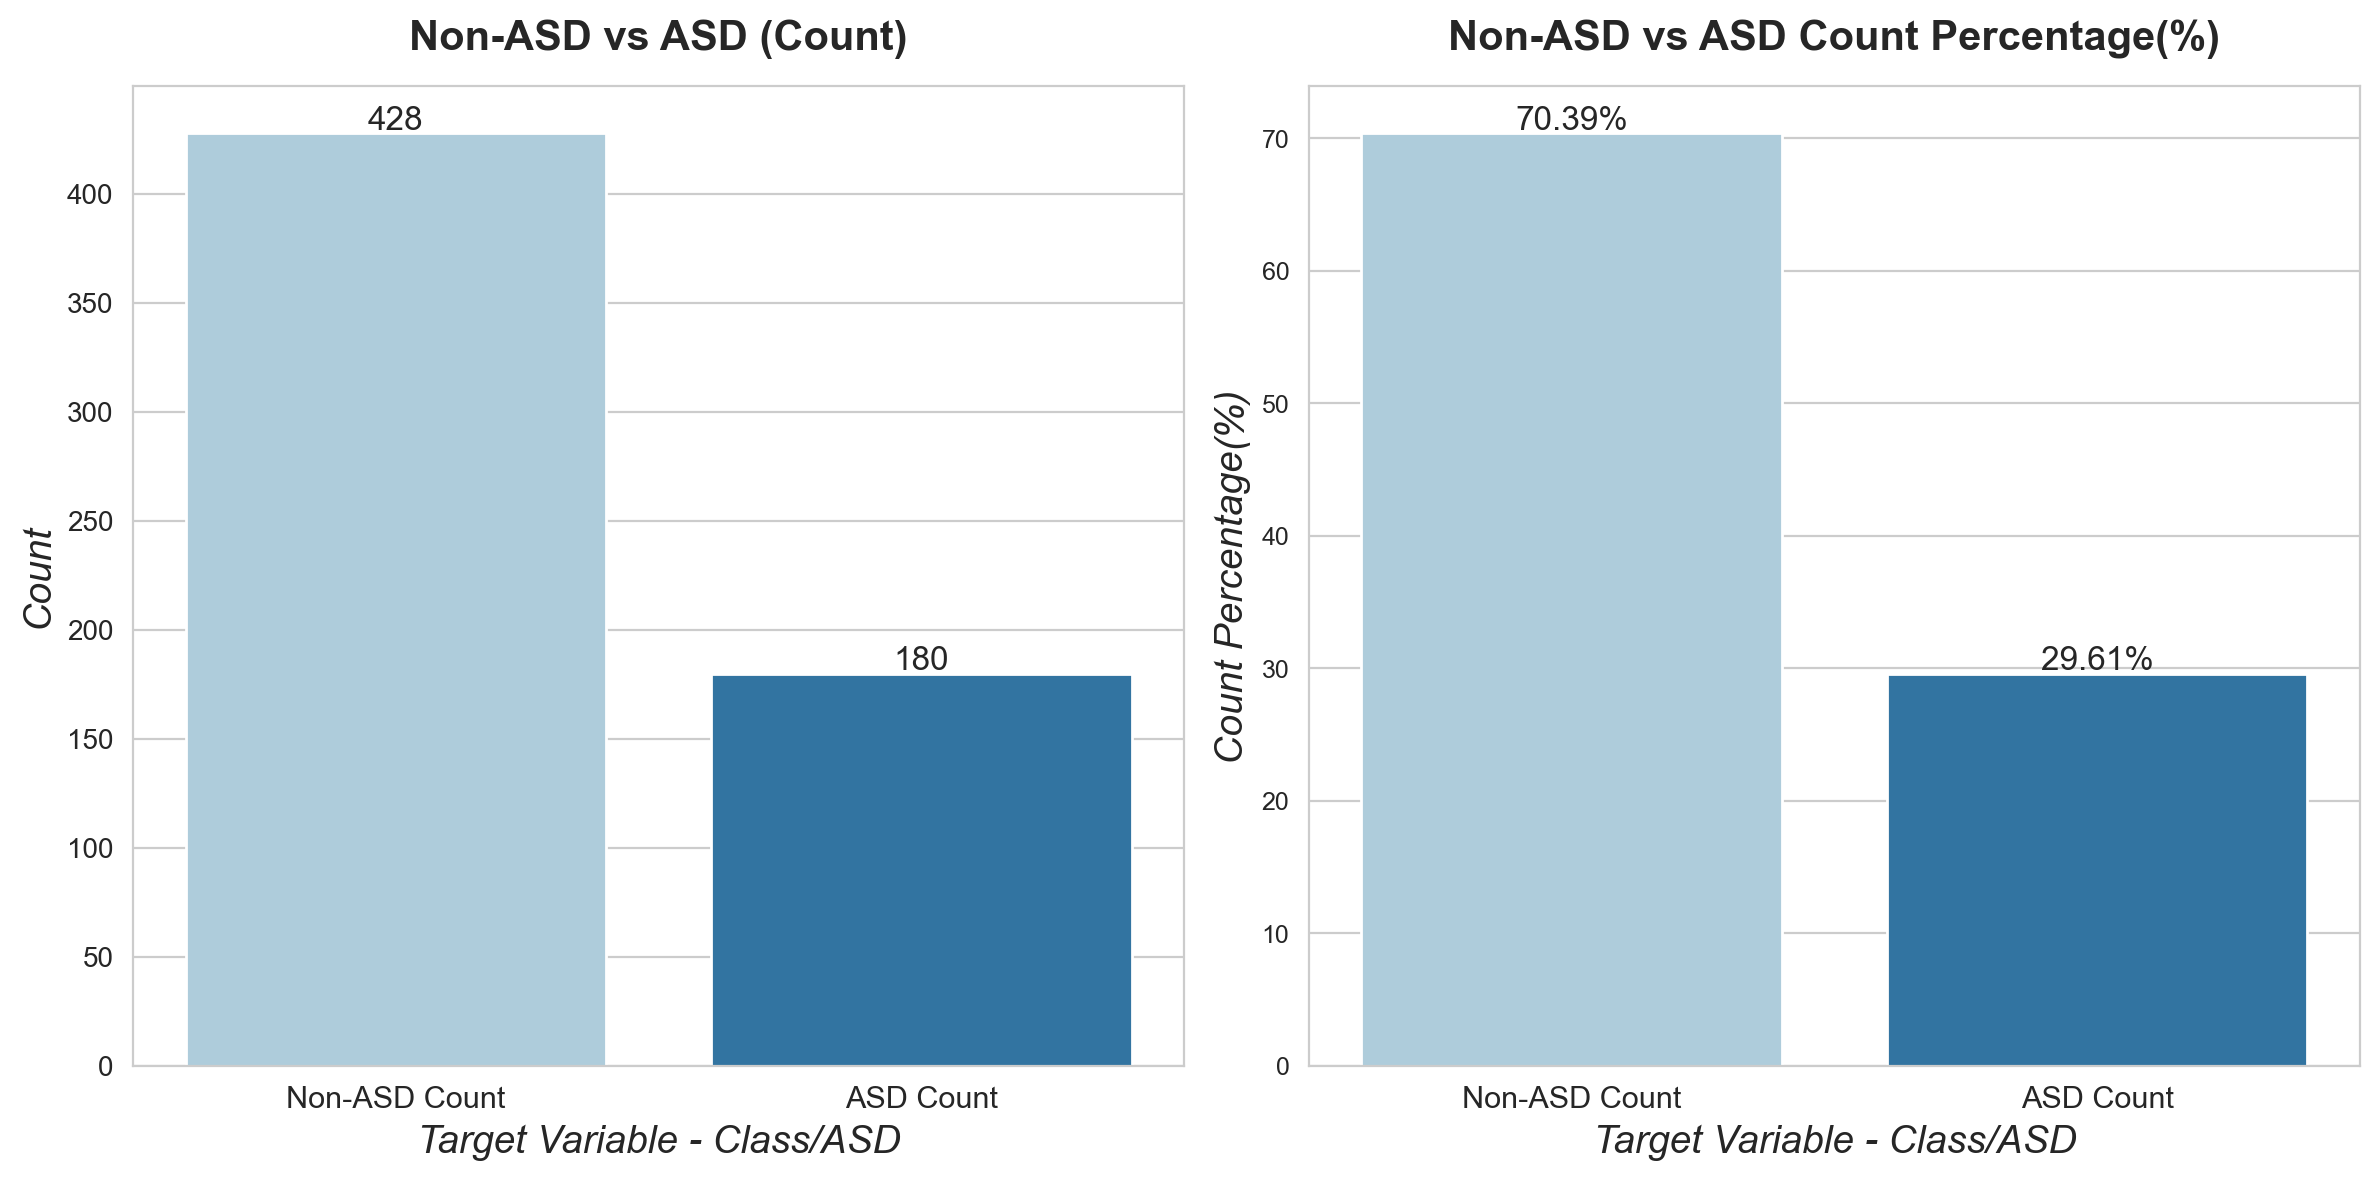

In [34]:
magic_helper_func.create_bar_plot_target(df)

**Observations:**<br>
(1) Target variable `'Class/ASD'` has an **approximate class label count ratio of 71:29**. Hence, it is safe to say that the `target variable is not highly imbalanced.`<br>
(2) **No need of imbalance correction technique**.

####  <font color='darkblue'>2.3.2. Visualizing Categorical Features

In [35]:
new_object_dtype_variables = df.select_dtypes([np.object]).columns.to_list()
object_dtype_features = [i for i in new_object_dtype_variables if i!="Class/ASD"]
print("Object Data-Type Categorical Features:\n", object_dtype_features)

Object Data-Type Categorical Features:
 ['Gender', 'Ethnicity', 'Jundice', 'Austim', 'Country_of_res', 'Used_app_before', 'Age_desc', 'Relation', 'Continent']


In [36]:
# Unique values belonging to object datatype features
magic_helper_func.unique_vals(df, object_dtype_features)

Unique values of 'Gender' variable:' {'f', 'm'}
Number of unique items in 'Gender':'2

Unique values of 'Ethnicity' variable:' {'White-European', 'South Asian', 'Latino', 'Middle Eastern ', 'Black', 'Turkish', 'Hispanic', 'Asian', 'Pasifika', 'Others'}
Number of unique items in 'Ethnicity':'10

Unique values of 'Jundice' variable:' {'yes', 'no'}
Number of unique items in 'Jundice':'2

Unique values of 'Austim' variable:' {'yes', 'no'}
Number of unique items in 'Austim':'2

Unique values of 'Country_of_res' variable:' {'Australia', 'Malaysia', 'Italy', 'Pakistan', 'China', 'Netherlands', 'Sweden', 'Portugal', 'Bahamas', 'Bolivia', 'Angola', 'Cyprus', 'Egypt', 'Aruba', 'India', 'United States', 'Brazil', 'Spain', 'Viet Nam', 'Austria', 'Burundi', 'New Zealand', 'Bangladesh', 'Canada', 'Germany', 'Ukraine', 'Philippines', 'Iceland', 'Ireland', 'Afghanistan', 'Romania', 'Serbia', 'Indonesia', 'Saudi Arabia', 'Czech Republic', 'Jordan', 'Nicaragua', 'Oman', 'Tonga', 'Costa Rica', 'Armenia',

**Additional Observation:**<br>Now, we also have `'Continent'` object datatype `categorical feature with six unique values`.

## <font color='Green'>Univariate Analysis

####  <font color='darkblue'>2.3.3. Country of residence and Continent analysis

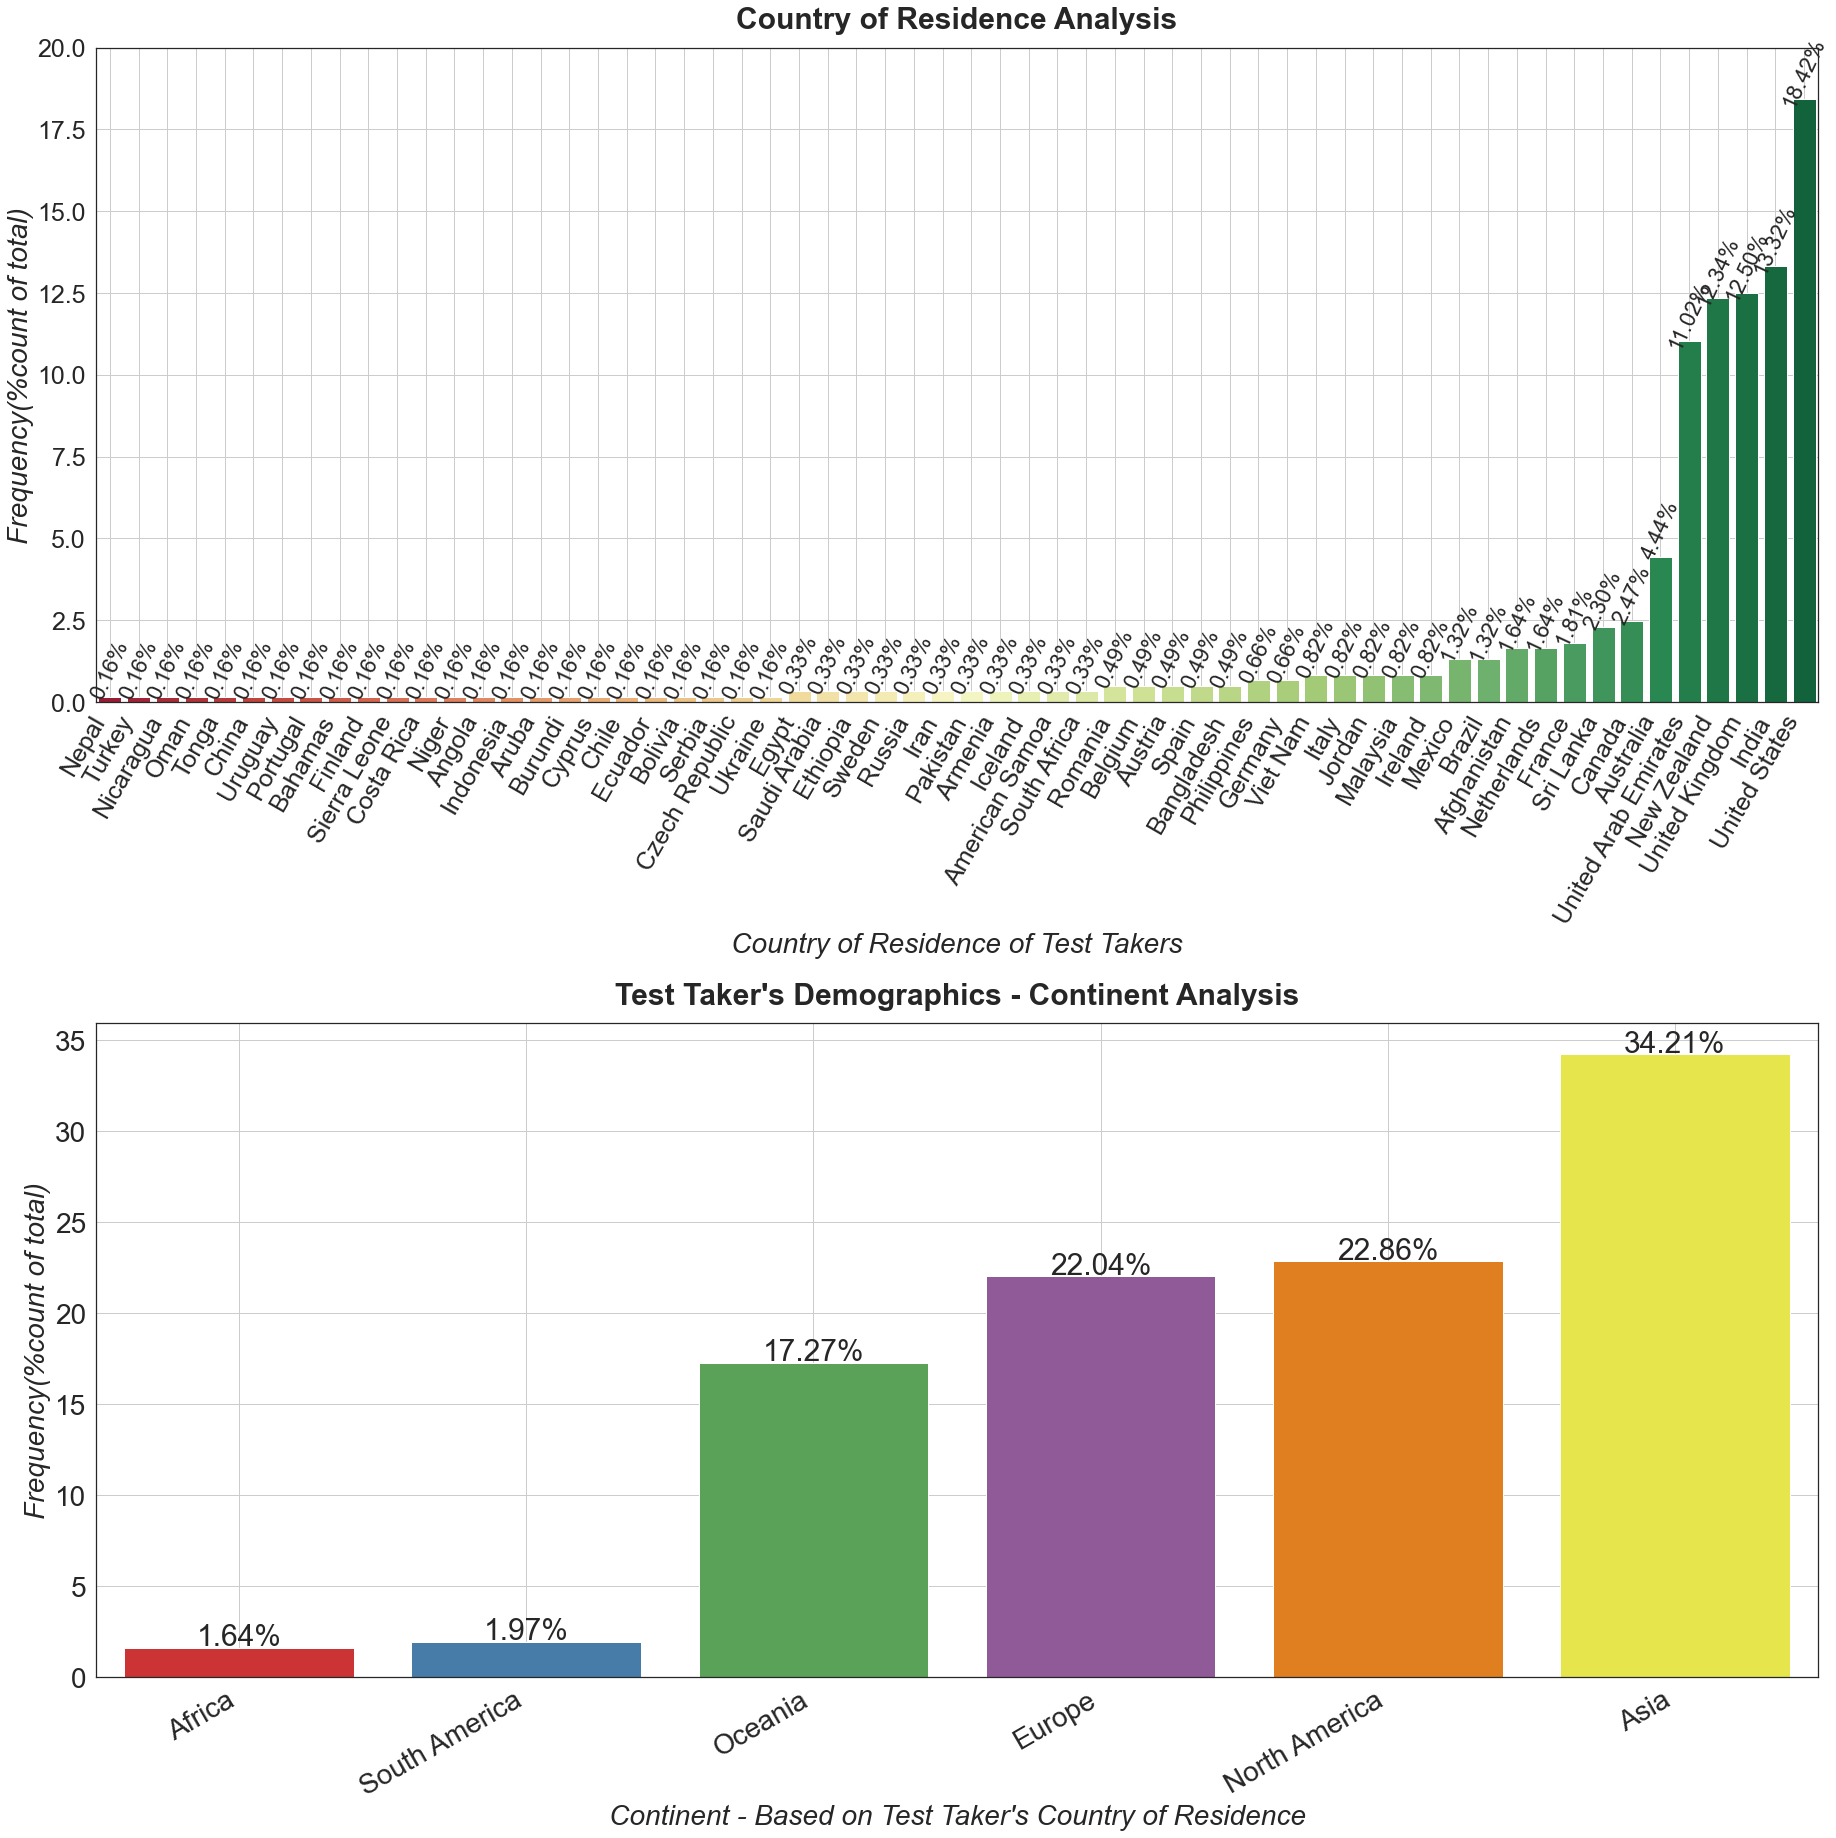

In [37]:
## Frequency bar plots: Country of residence and Continent features    
magic_helper_func.create_barplots_demographics_1(df)

**Observations:**<br>
(1) **Highest percentage `(Overall 72.04%)` of test takers belong to the following six countries** in the descending order of count: <br>`'United States', 'India', 'United Kingdom', 'New Zealand', ' United Arab Emirates' and 'Australia'`<br>
(2) Thus, **majority of test takers (Overall 96.38%)** belong to `'Asia', 'North America' and 'Europe' and 'Oceania'` **continents**

**Note:**<br>**Dropping the `'Country_of_res'`** feature and **retaining newly derived feature 'Continent'** for sake *for coarse granularity* in the categories

In [38]:
# Dropping the 'Country_of_res' feature and retaining newly derived feature 'Continent'
df = df.drop(["Country_of_res"], axis=1)

####  <font color='darkblue'>2.3.4. Visualizing test taker's 'Ethnicity', 'Relation' and 'Age_desc' feature data

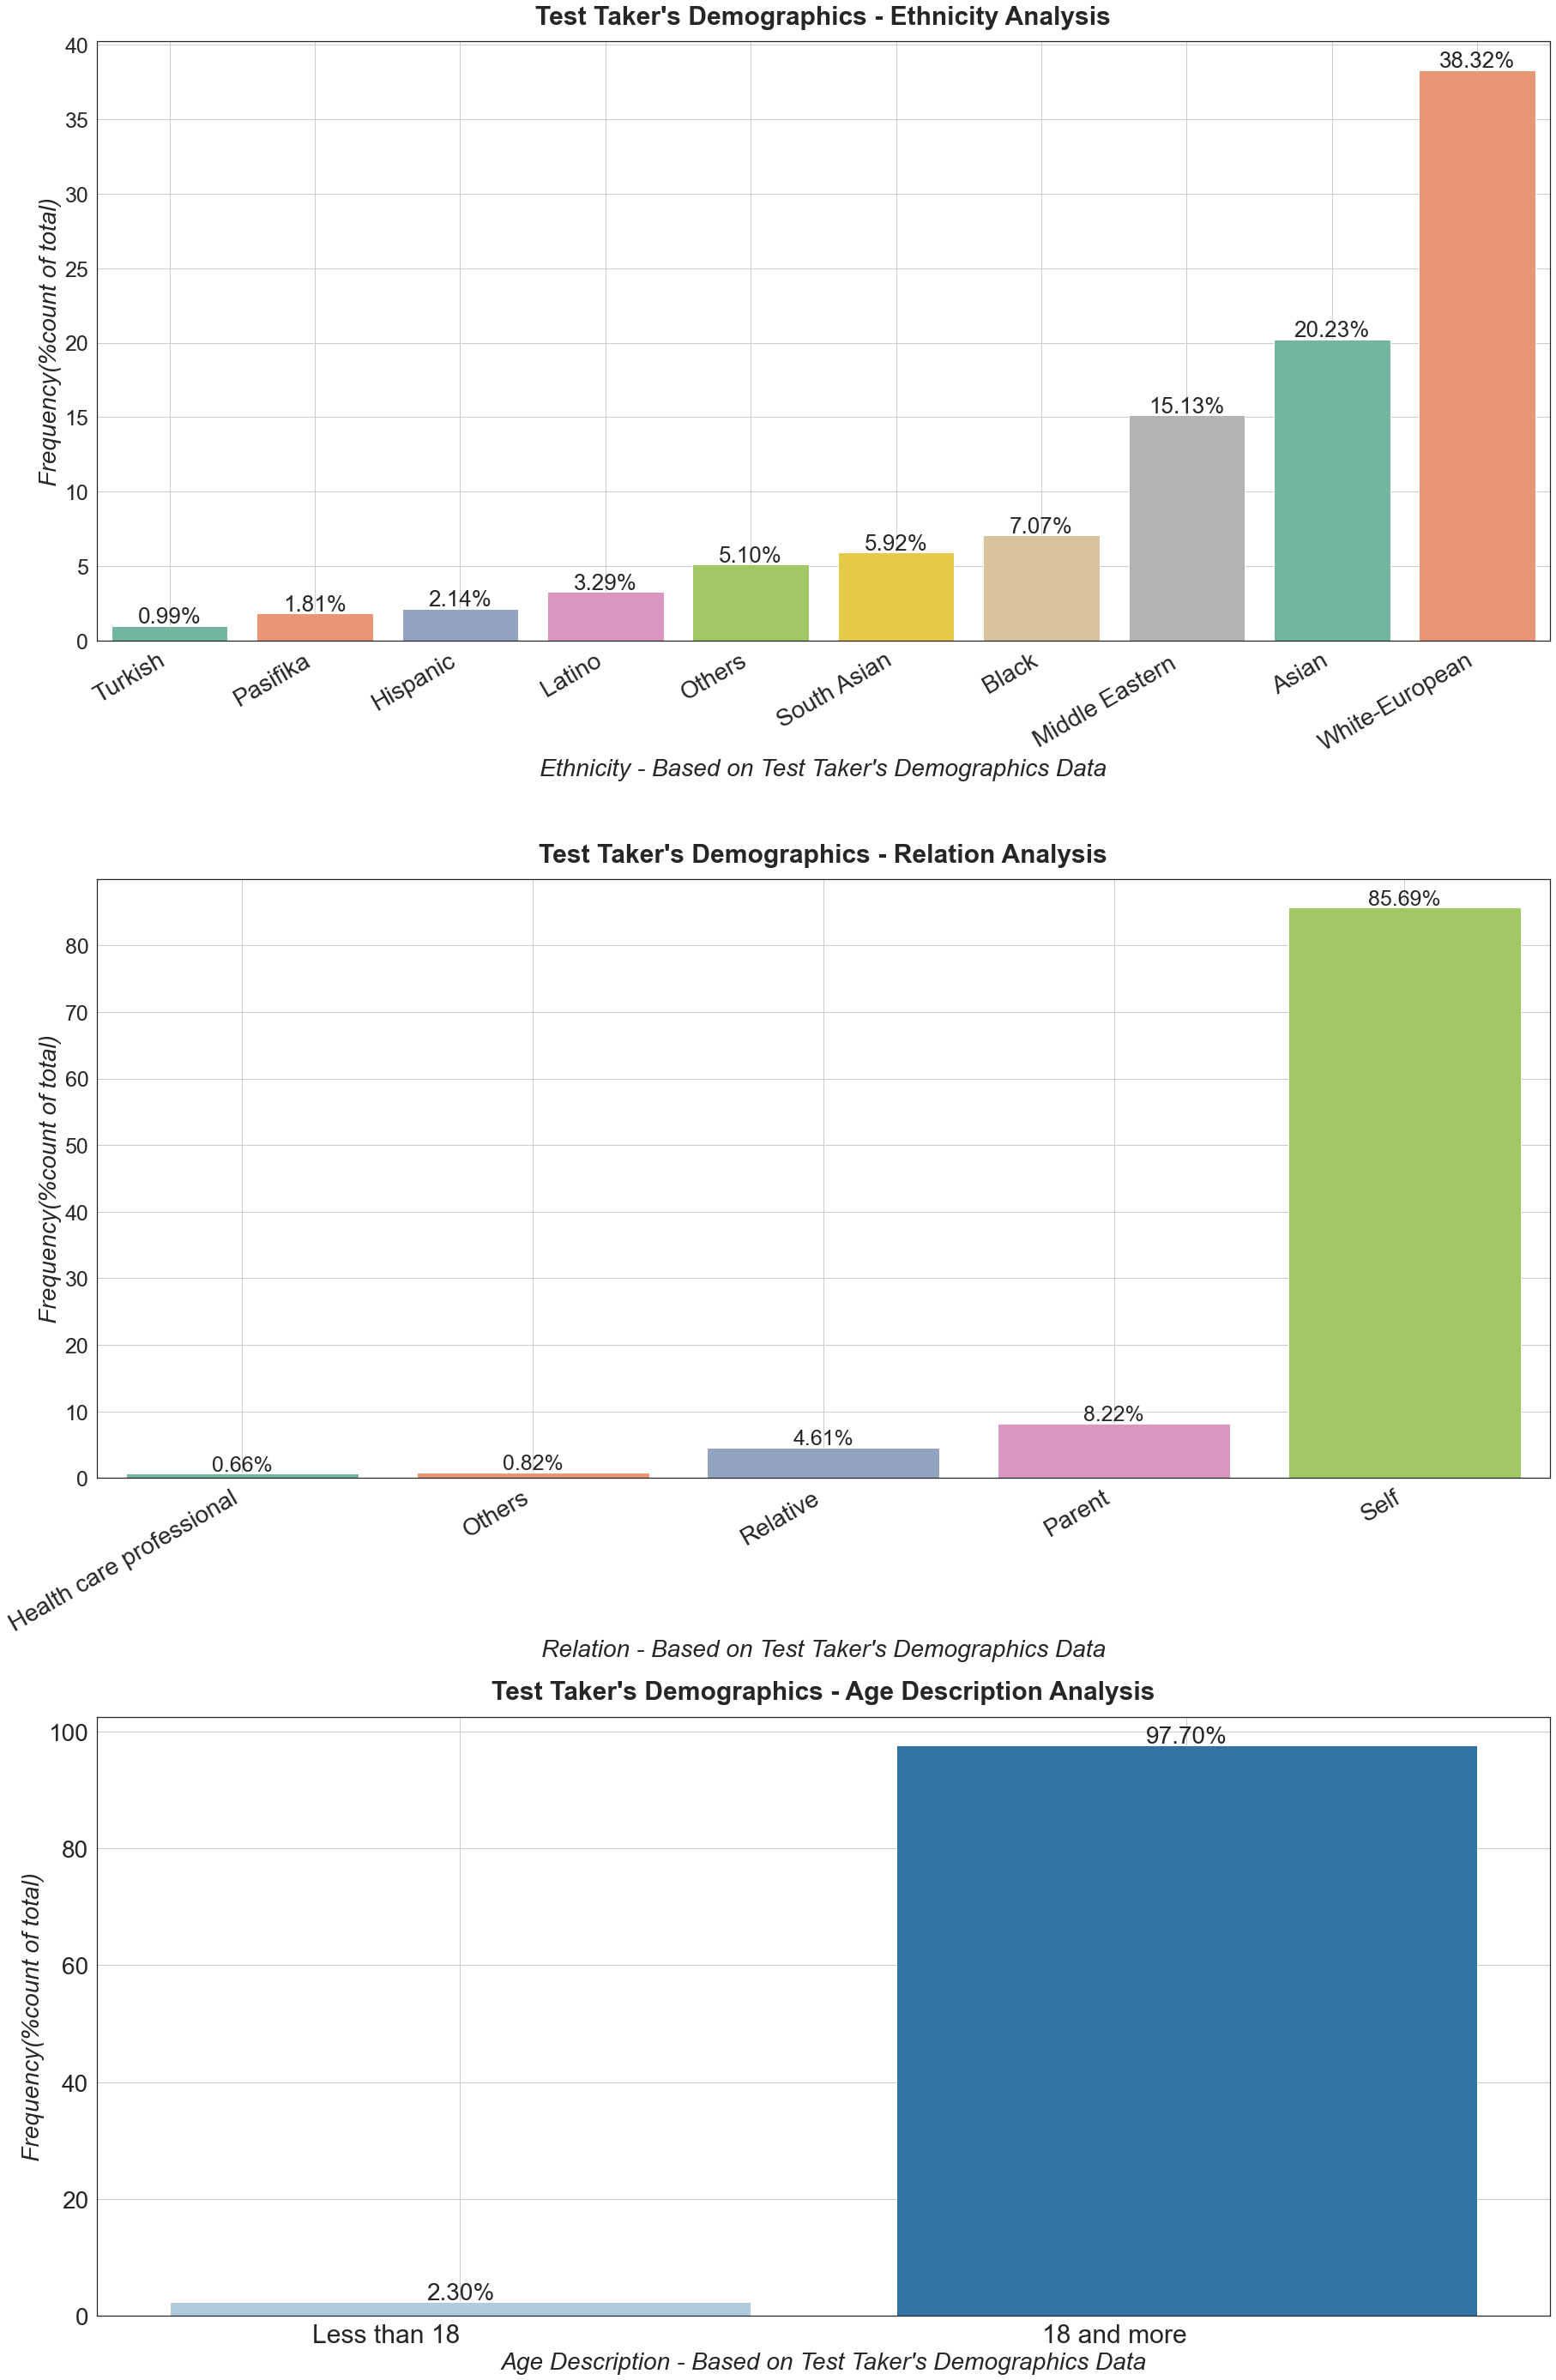

In [39]:
# Frequency bar plots for visualizing test taker's 'Ethnicity', 'Relation' and 'Age_desc' feature data
magic_helper_func.create_barplots_demographics_2(df)

**Observations:**<br>
(1) Majority `85.69%` of test-takers took the test by themselves followed by `8.22%` being helped by `'Parent'` assisting some applicants. This makes sense as `2.3%` of applicants are minors (Less than 18 years of age) <br>
(2) Most of the test takers belong to `'White-European', 'Asian' and 'Middle Eastern' ethnicities`.

####  <font color='darkblue'>2.3.5. Visualizing remaining binary categorical variables

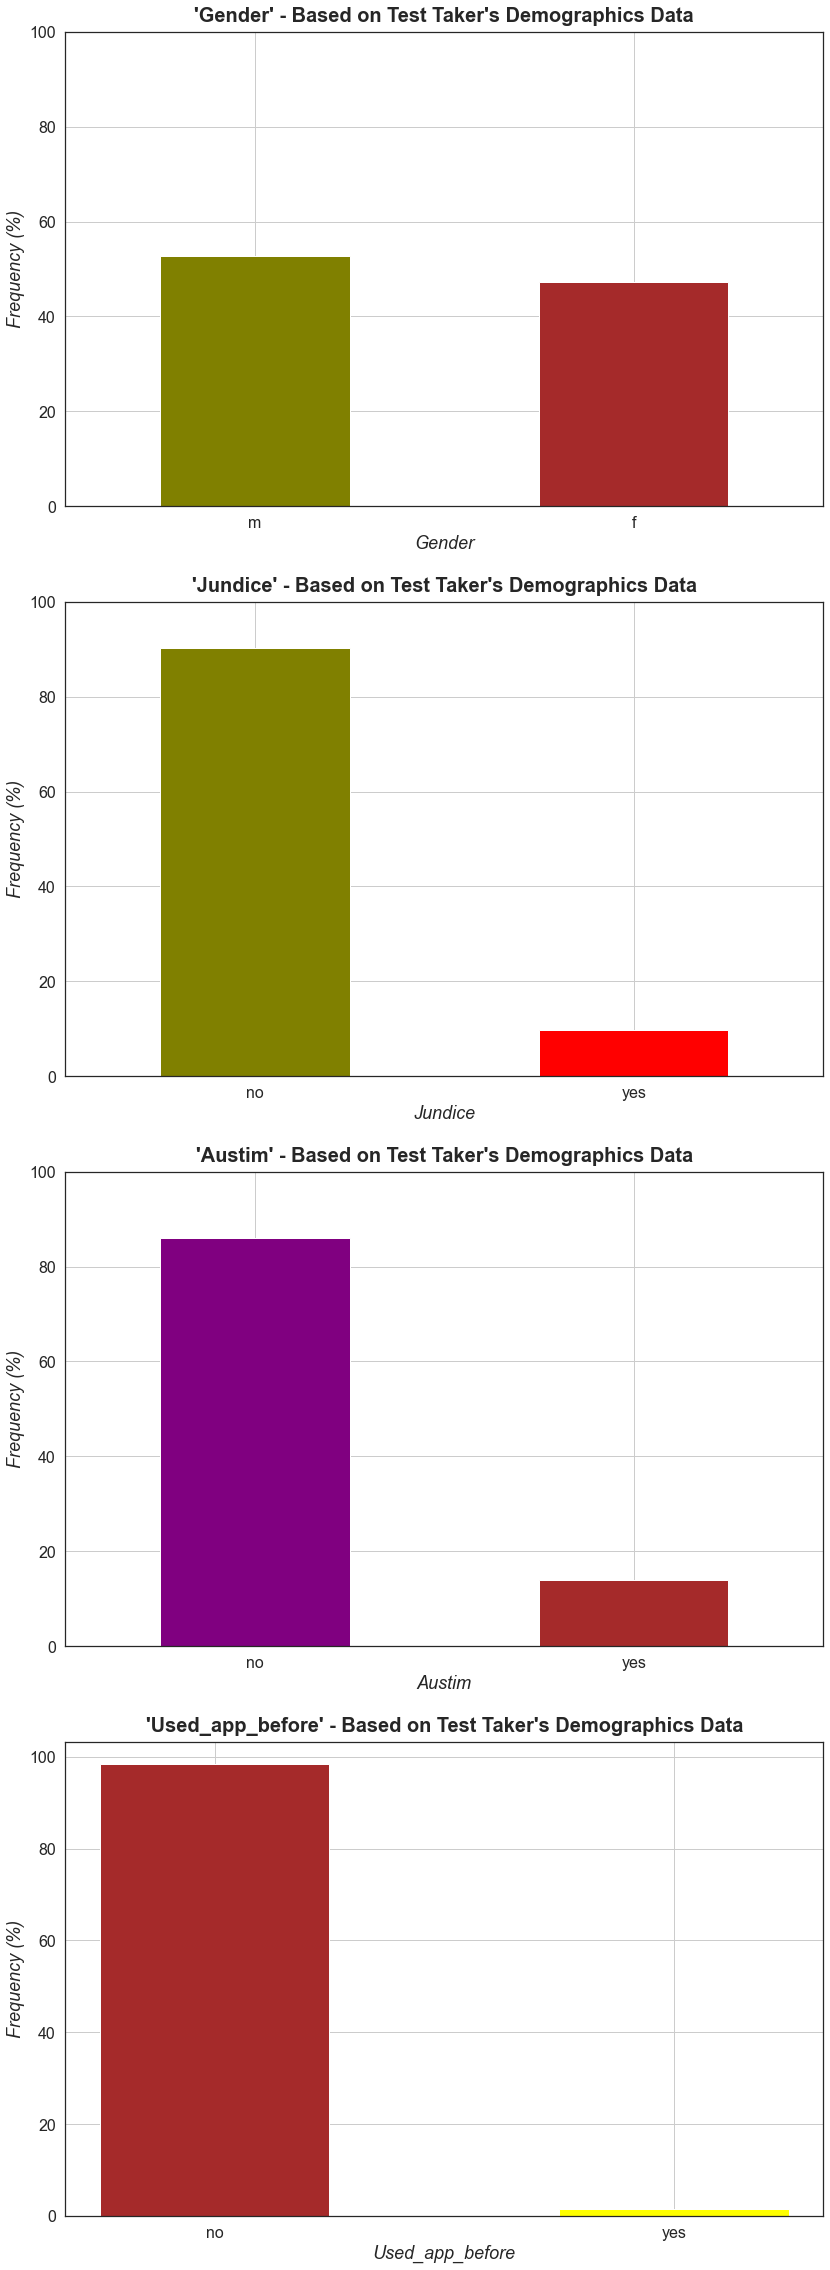

In [40]:
# List of remaining binary categorical variables
remaining_catb_features = ['Gender', 'Jundice', 'Austim', 'Used_app_before']  

## Visualizing remaining binary categorical variables
magic_helper_func.create_barplots_cat_binary(df, remaining_catb_features)

**Observations:**<br>
(1) Unbiased number of test takers based on `'Gender'`<br>
(2) The percentage of test takers with `'Jundice'` (born with Jundice), `'Austim'` (family history of PDD) and `who have used the app before` are **significantly less in number**

##  <font color='green'>Bivariate Analysis

####  <font color='darkblue'>2.3.6. Analyzing cateogrical variables against the target variable "Class/ASD"

In [41]:
object_dtype_features = [i for i in (df.select_dtypes([np.object]).columns.to_list()) if i!="Class/ASD"]
object_dtype_features

['Gender',
 'Ethnicity',
 'Jundice',
 'Austim',
 'Used_app_before',
 'Age_desc',
 'Relation',
 'Continent']

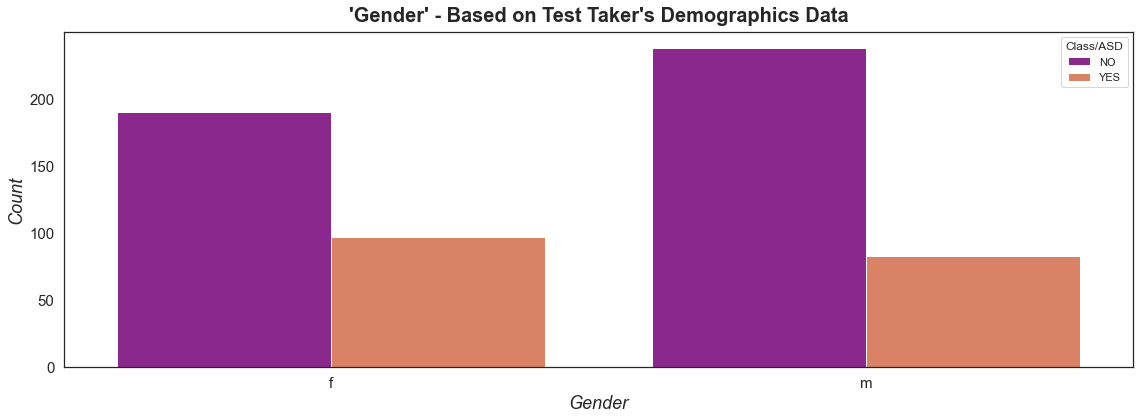

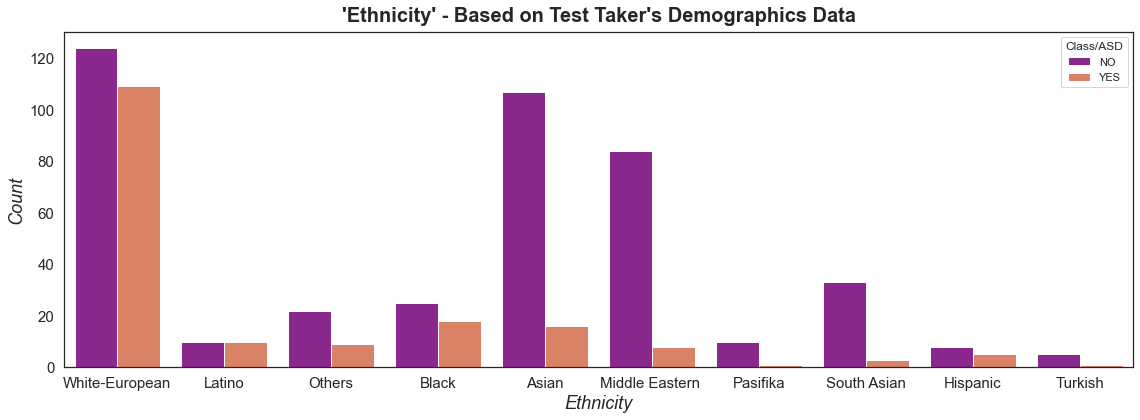

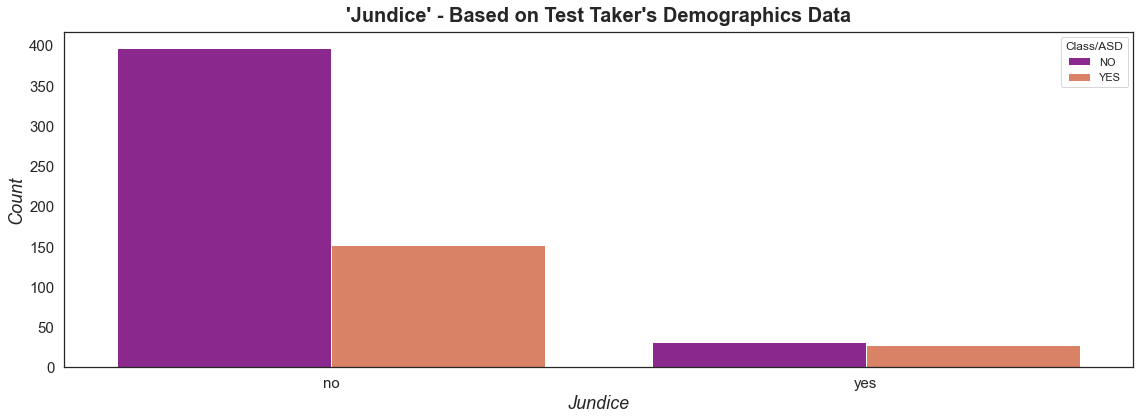

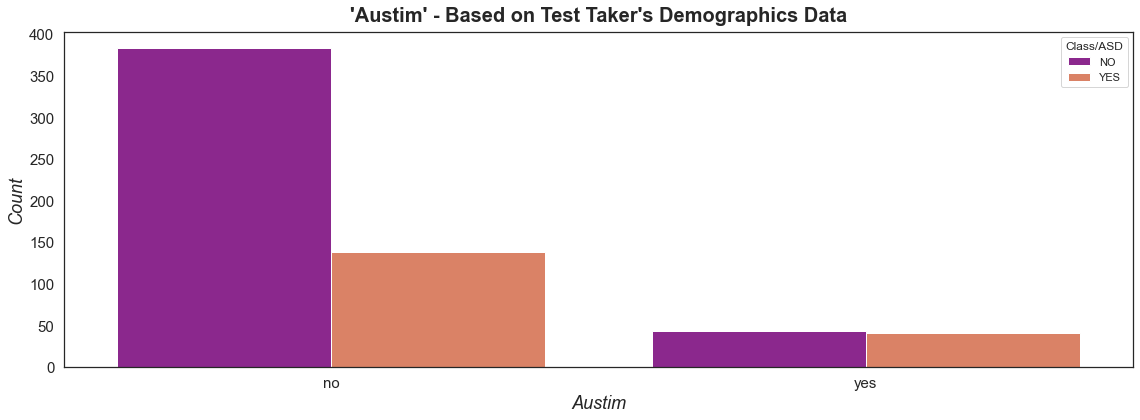

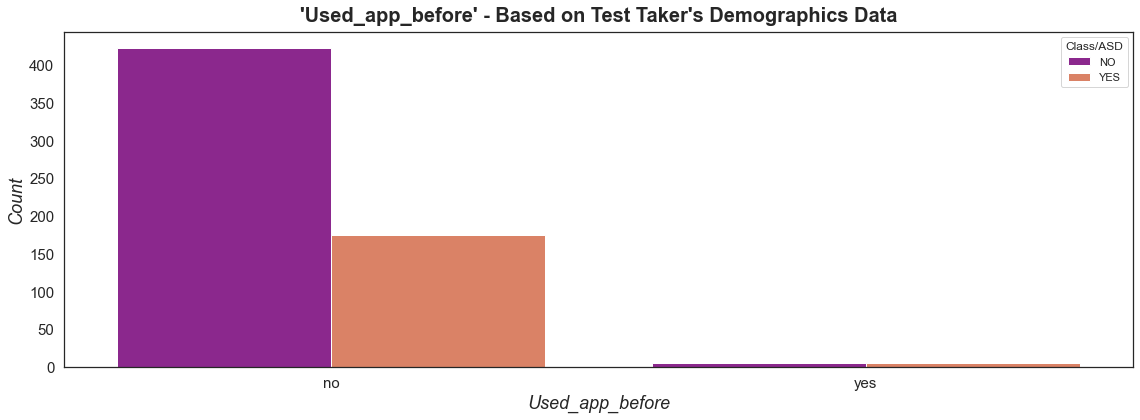

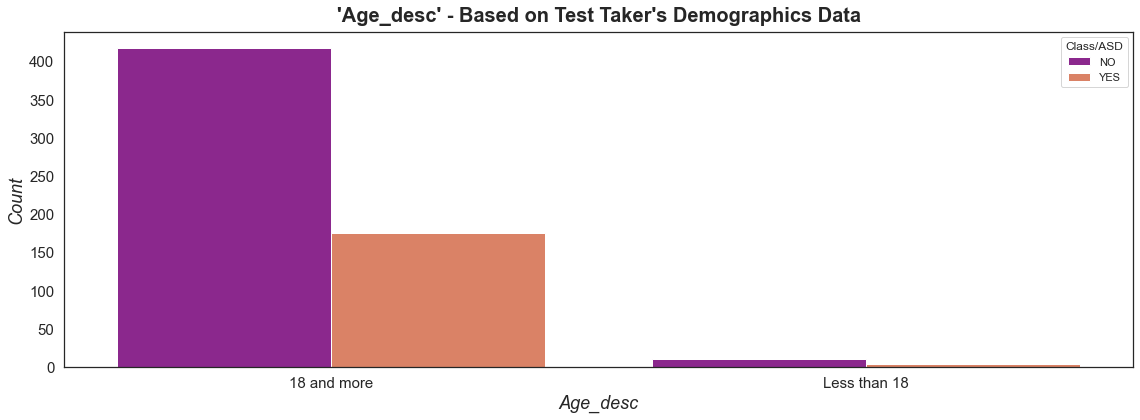

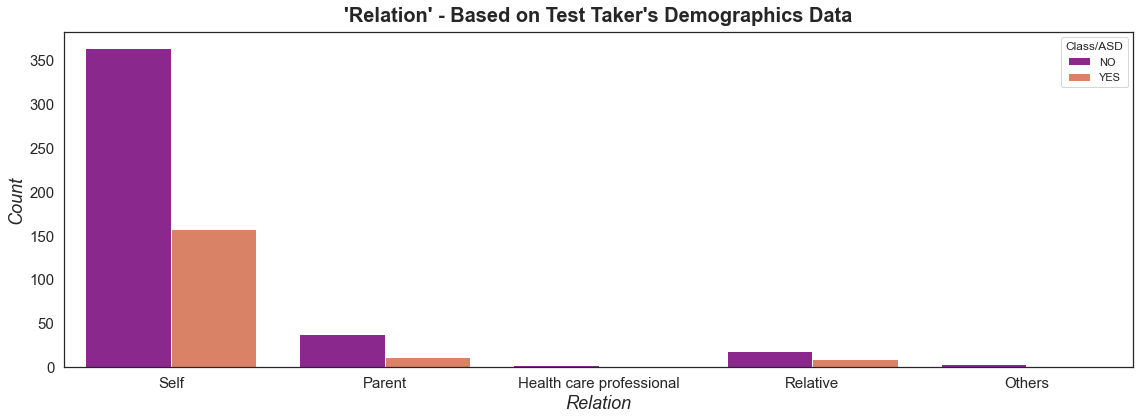

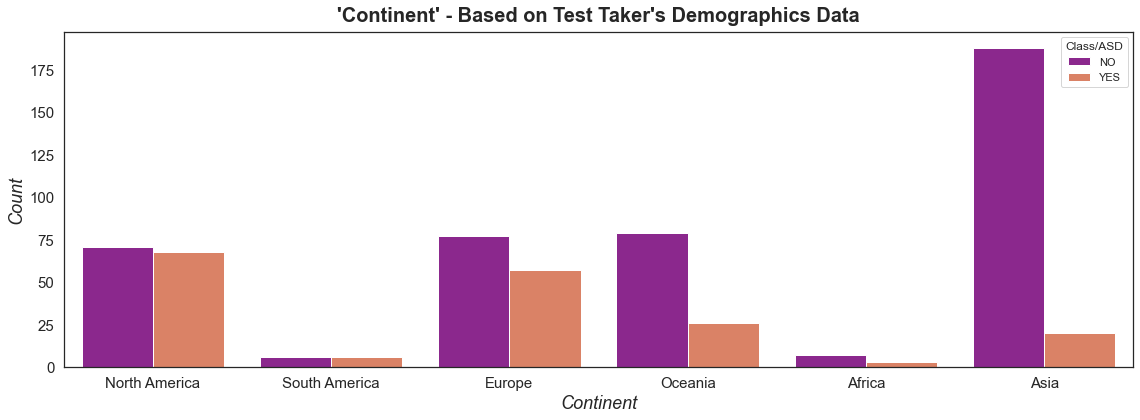

In [42]:
# Plots of categorical variables against the target variable "Class/ASD"
magic_helper_func.plot_cat_vars_vs_target(df=df, 
                                    cat_features=object_dtype_features,
                                         target_col="Class/ASD")

**Observations:**<br>
(1) **Most of the cases belonging to Non-ASD are high in number** and can see seen collectively from these plots<br>
(2) `Asia` has **significantly less number of ASD patients** in comparison to `North America`, where the **ratio of test-takers with ASD to Non-ASD is high** (almost 1:1)<br>
(3) **No comments can be made on the basis of `'Relation'`, `'Used_app_before'`, `'Gender'` and `'Age_desc'` features, as the number of samples who belong to classes within are highly skewed.** Hence, it is evident and no specific conclusion can be derived from it.<br>
(4) There are `more chances of a patient having ASD status` **if born with `'Jundice'` or have a history of PPD as indicated by `'Austim'` feature.**

#### <font color='darkblue'>2.3.7. Analyzing numeric features against the target variable "Class/ASD"

In [43]:
numeric_features = df.select_dtypes([np.int]).columns.to_list()
print(numeric_features)

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Result']


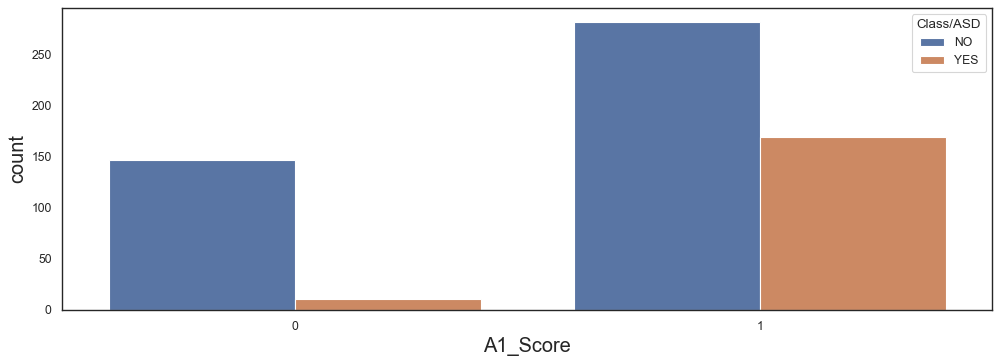

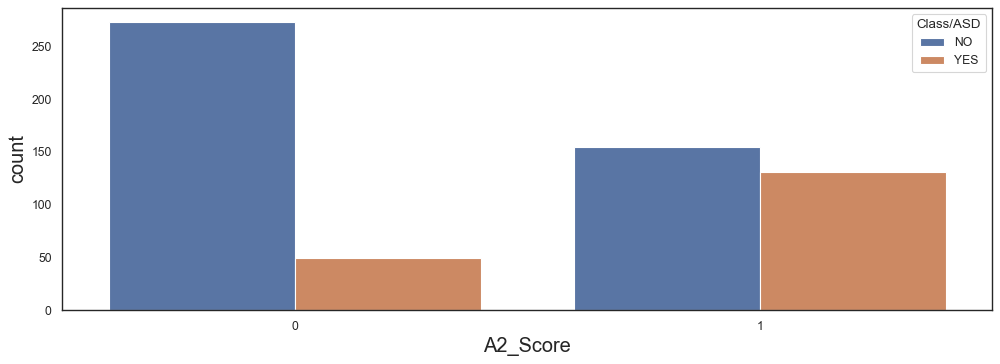

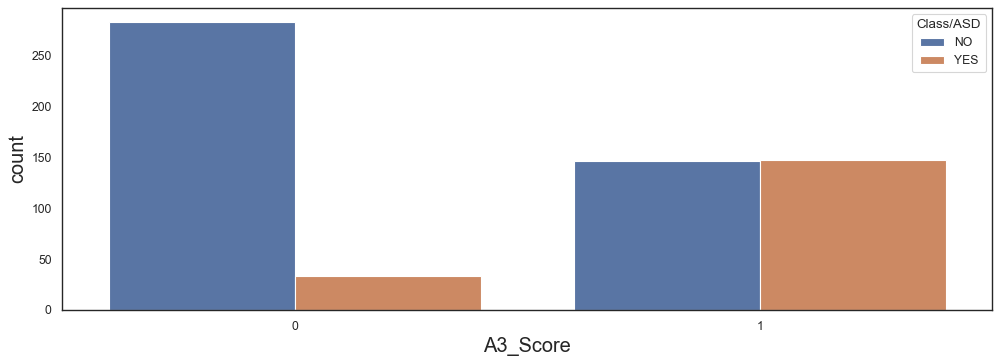

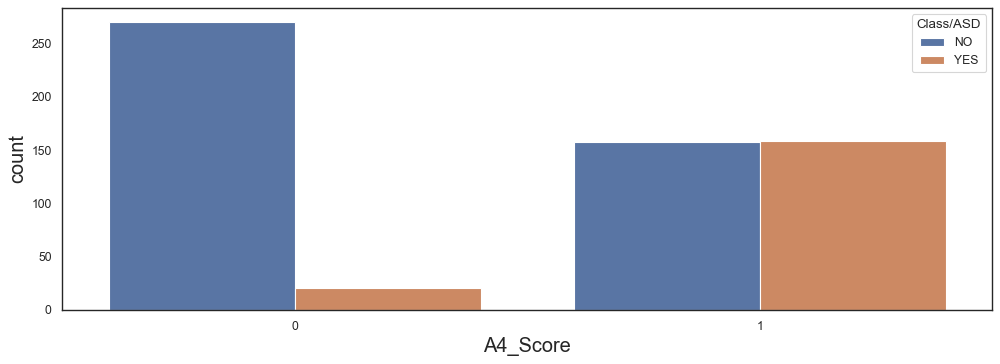

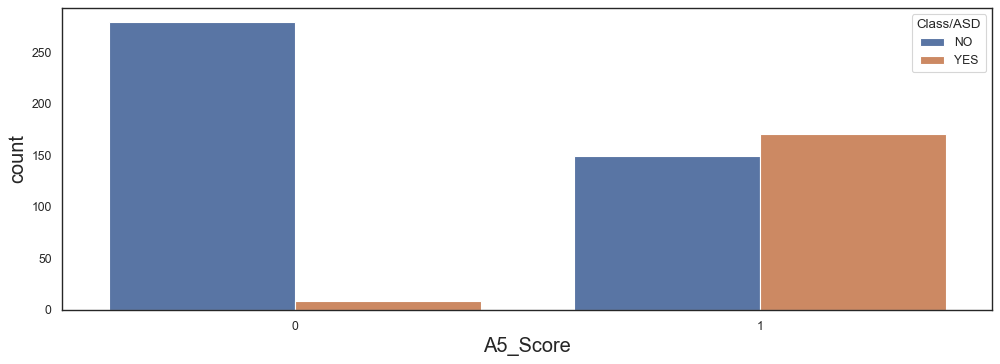

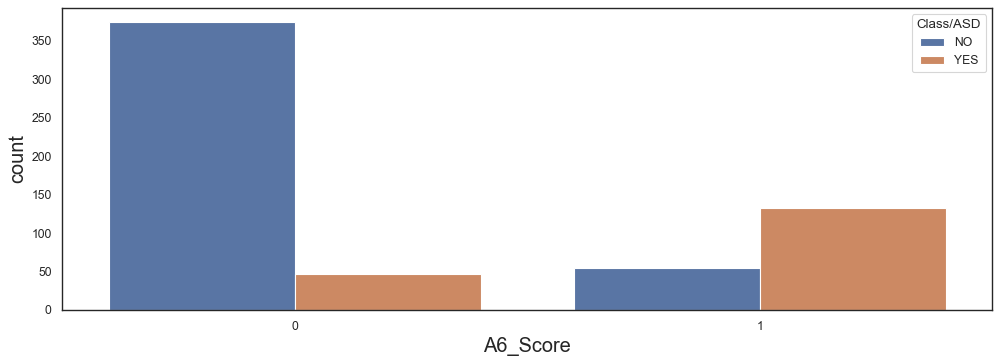

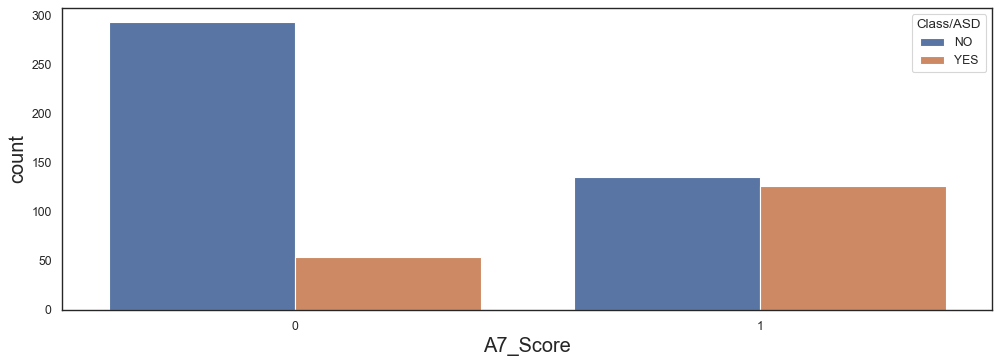

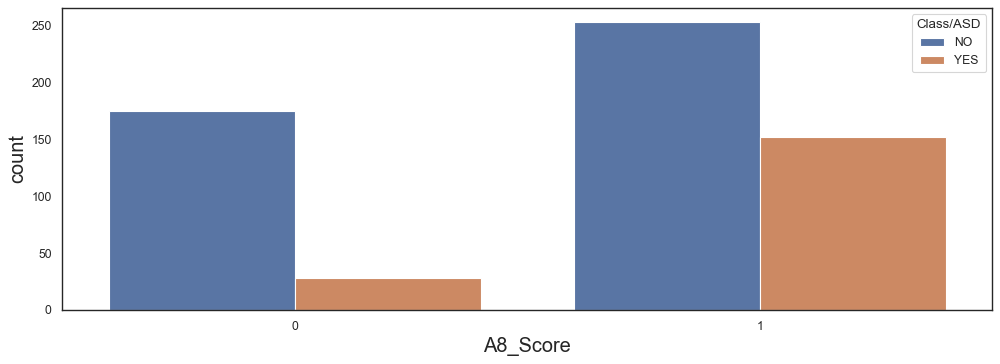

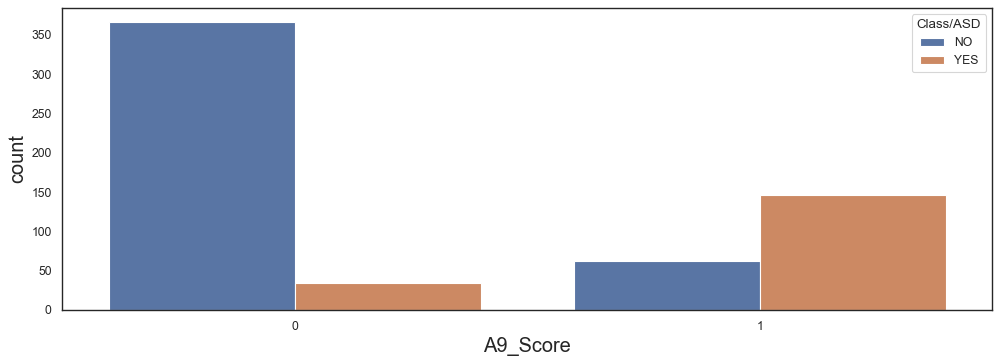

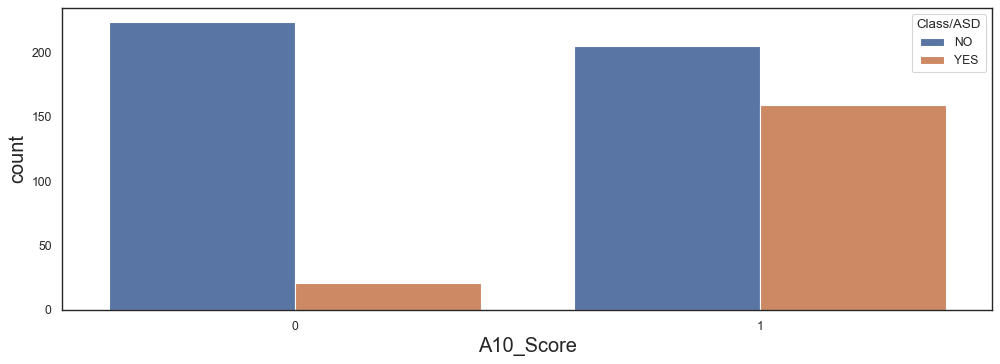

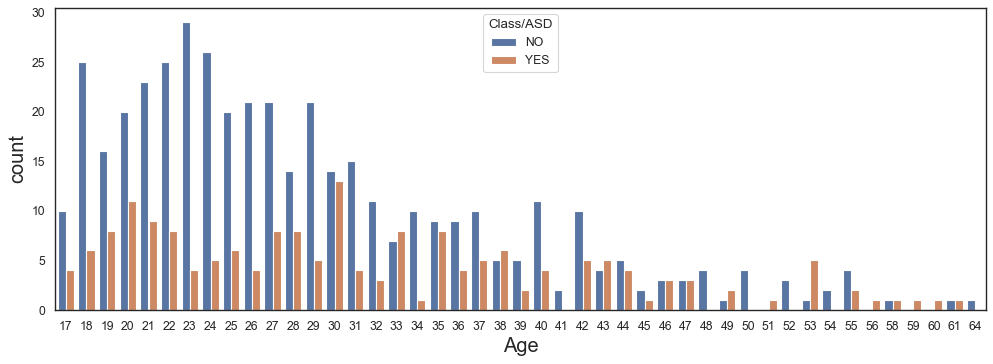

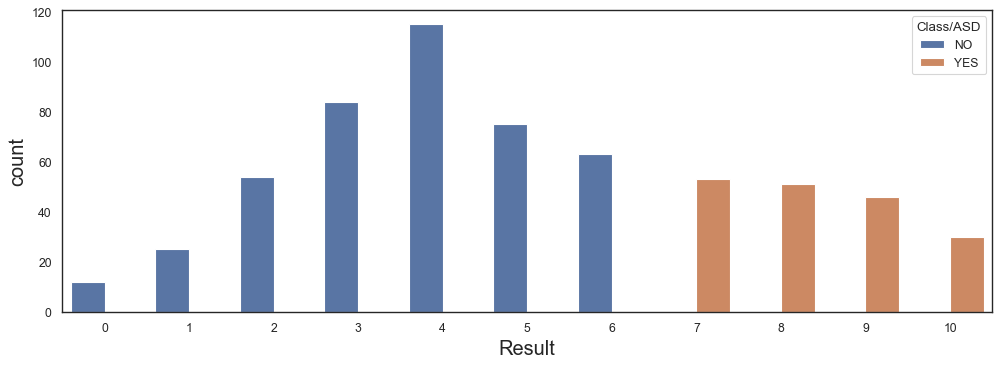

In [44]:
# Plots: Numeric variables vs target variable 'Class/ASD'        
magic_helper_func.plot_numeric_vars_vs_target(df, numeric_features)

**Observations:**<br>
(1) Most of the people who choose `'agree'` (i.e.1) as a response to the A_Score test of 10 questions had **high chances of being identified** as potential candidate with **ASD***<br>
(2) Most of the **test-takers who were detected with ASD belonged to the age groups - `18-22`, `27-30` and `33-38` years of age**. Since, the number of test takers post 44 years of age seem to be reduced, it can't be concluded that people belonging to that group are less susceptible to this disorder. More sample tests for applicants under this group are required.<br>
(3) **Test-takers with the final screening score of `7-10` definitely had ASD**

###  <font color='green'>Correlation Matrix and Heatmap
#### <font color='darkblue'>2.3.8. Analyzing correlation between numeric features using heatmap

<Figure size 1200x800 with 0 Axes>

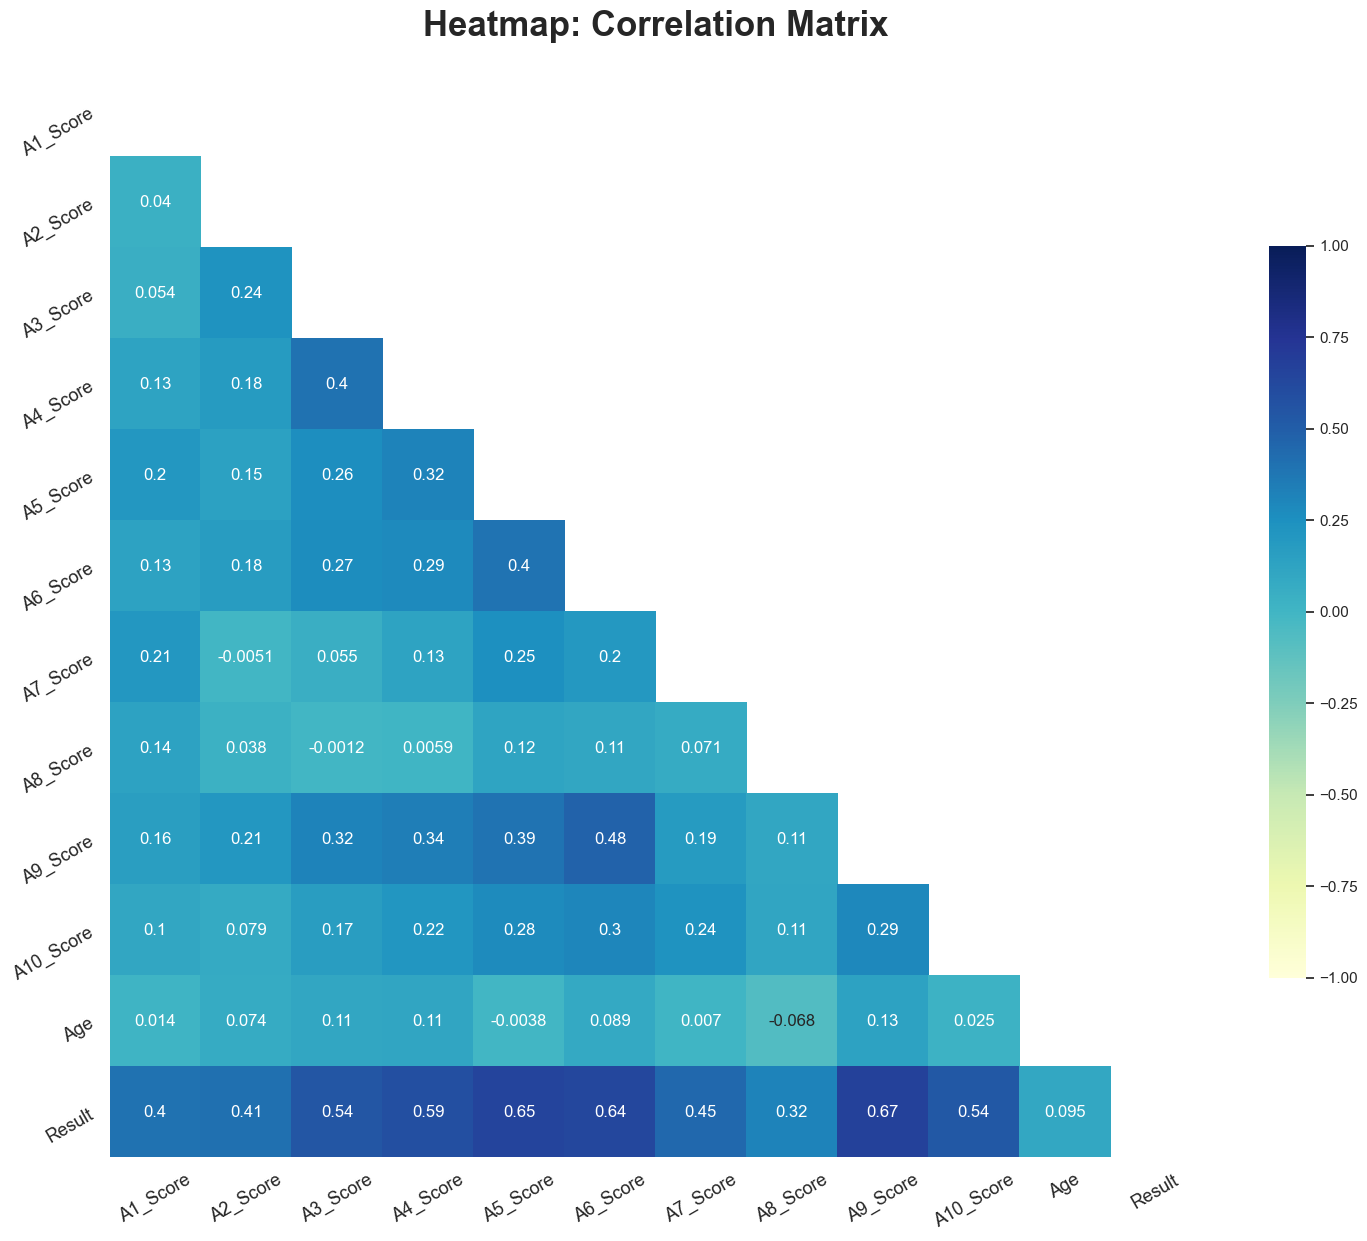

In [45]:
# # Analyzing numeric features
# Let's check the correlation between all the feature variables to see if there is pattern between numeric variables
magic_helper_func.plot_heatmap(df)

**Observations:**<br>
All **the test takers' responses from A1 and A10 are correlated** to the `Result` independent variable. Hence, **dropping 'Result' variable to eliminate multicollinearity.**

<Figure size 1200x800 with 0 Axes>

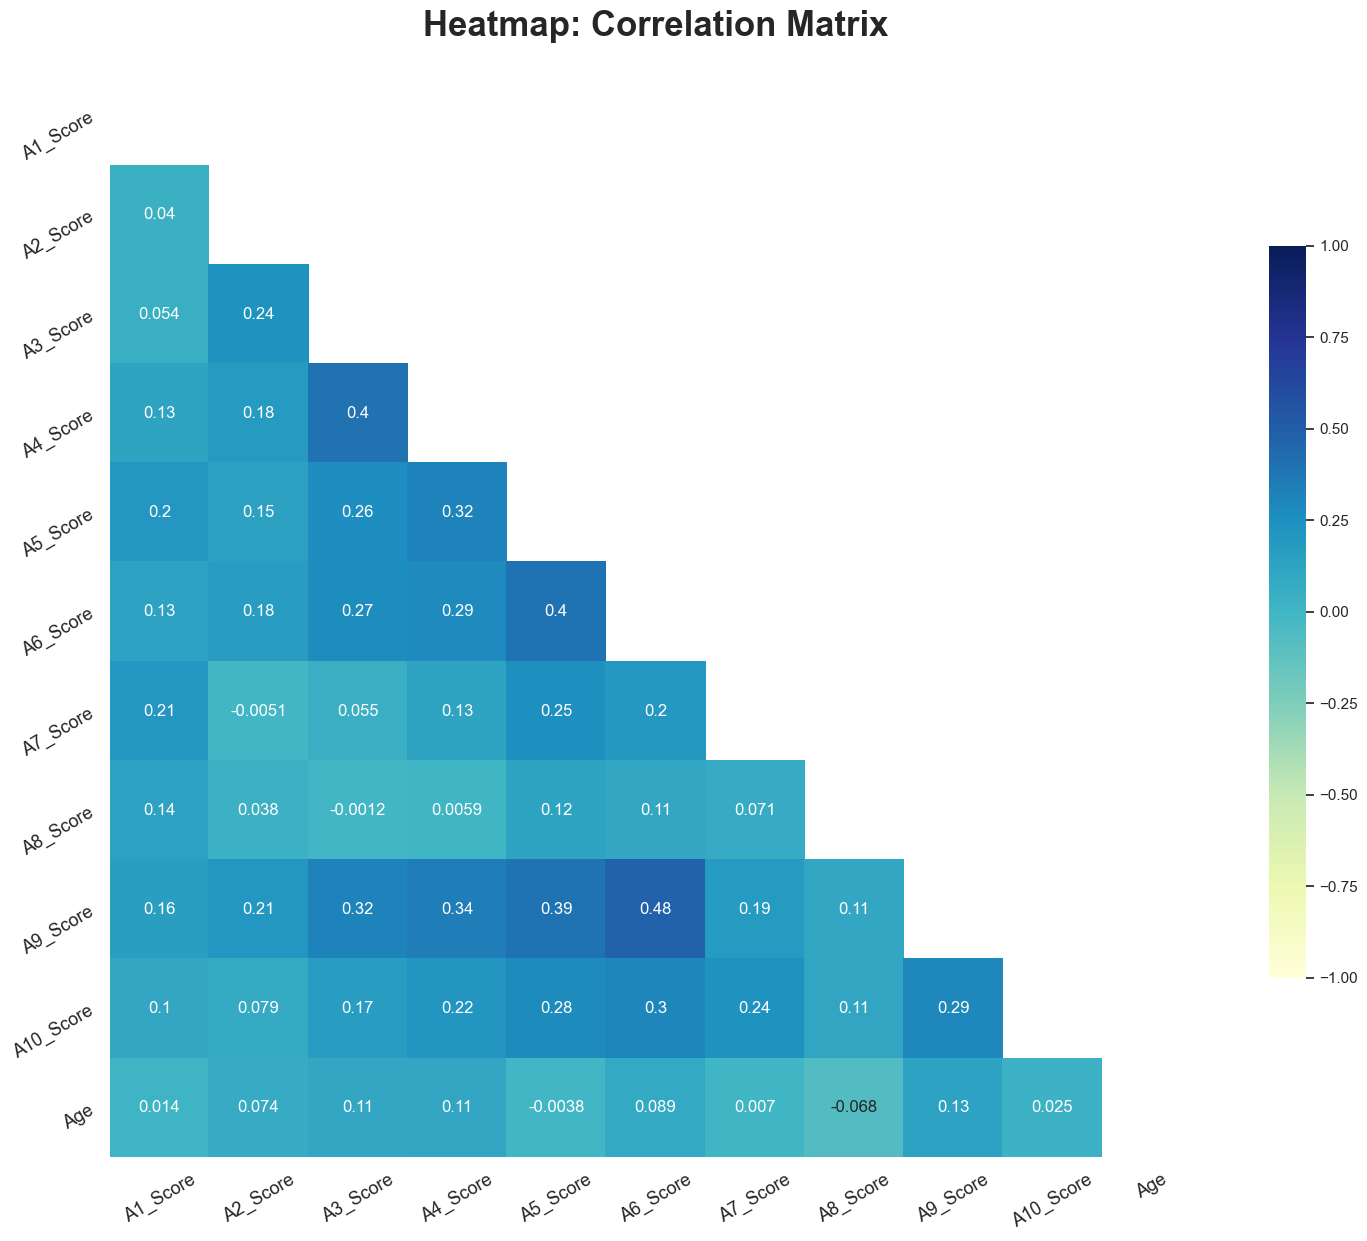

In [46]:
df = df.drop(["Result"], axis=1)

# Plotting the heatmap again
magic_helper_func.plot_heatmap(df)

In [47]:
# Variables in the dataset (Features + Target variable)
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jundice', 'Austim', 'Used_app_before', 'Age_desc',
       'Relation', 'Class/ASD', 'Continent'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 703
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         608 non-null    int32 
 1   A2_Score         608 non-null    int32 
 2   A3_Score         608 non-null    int32 
 3   A4_Score         608 non-null    int32 
 4   A5_Score         608 non-null    int32 
 5   A6_Score         608 non-null    int32 
 6   A7_Score         608 non-null    int32 
 7   A8_Score         608 non-null    int32 
 8   A9_Score         608 non-null    int32 
 9   A10_Score        608 non-null    int32 
 10  Age              608 non-null    int32 
 11  Gender           608 non-null    object
 12  Ethnicity        608 non-null    object
 13  Jundice          608 non-null    object
 14  Austim           608 non-null    object
 15  Used_app_before  608 non-null    object
 16  Age_desc         608 non-null    object
 17  Relation         608 non-null    ob

####  <font color='darkblue'>2.3.9. One-hot encode categorical values

In [49]:
## Mapping binary values, '0' and '1' to the binary category variables

df['Gender'] = df['Gender'].map({'m': 1, 'f': 0})
df['Jundice'] = df['Jundice'].map({'yes': 1, 'no': 0})
df['Austim'] = df['Austim'].map({'yes': 1, 'no': 0})
df['Used_app_before'] = df['Used_app_before'].map({'yes': 1, 'no': 0})
df['Age_desc'] = df['Age_desc'].map({'18 and more': 1, 'Less than 18': 0})
df['Class/ASD'] = df['Class/ASD'].map({'YES': 1, 'NO': 0})

# Using 'get_dummies' for remaining object dtype variables
df = pd.get_dummies(df, drop_first=False)

# Check the final preprocessed dataset
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Jundice,Austim,Used_app_before,Age_desc,Class/ASD,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Others,Ethnicity_Pasifika,Ethnicity_South Asian,Ethnicity_Turkish,Ethnicity_White-European,Relation_Health care professional,Relation_Others,Relation_Parent,Relation_Relative,Relation_Self,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,1,0,1,35,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
5,1,1,1,1,1,0,1,1,1,1,36,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [50]:
# Final dataset shape (prior model training)
df.shape

(608, 38)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 703
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   A1_Score                           608 non-null    int32
 1   A2_Score                           608 non-null    int32
 2   A3_Score                           608 non-null    int32
 3   A4_Score                           608 non-null    int32
 4   A5_Score                           608 non-null    int32
 5   A6_Score                           608 non-null    int32
 6   A7_Score                           608 non-null    int32
 7   A8_Score                           608 non-null    int32
 8   A9_Score                           608 non-null    int32
 9   A10_Score                          608 non-null    int32
 10  Age                                608 non-null    int32
 11  Gender                             608 non-null    int64
 12  Jundice               

#  <font color='Blue'>Step 3:
##  <font color='Purple'>3.1. Splitting the dataset into train and test datasets

In [52]:
## Splitting the dataset into train and test sets
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=0)

In [53]:
df_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Jundice,Austim,Used_app_before,Age_desc,Class/ASD,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Others,Ethnicity_Pasifika,Ethnicity_South Asian,Ethnicity_Turkish,Ethnicity_White-European,Relation_Health care professional,Relation_Others,Relation_Parent,Relation_Relative,Relation_Self,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
589,1,1,1,0,0,0,0,0,0,0,21,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
104,0,0,0,0,1,1,0,1,0,1,21,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
615,1,0,1,1,0,1,0,1,0,1,27,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
522,1,1,1,1,1,0,1,0,1,0,47,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
214,1,1,1,1,0,0,0,0,0,1,42,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


###  <font color='darkblue'>3.2. Scaling

In [54]:
# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the binary mapped or 'dummy' (one-hot encoded) variables
num_variables = ["Age"]

# scaler 'fit_transform' on train data
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

# scaler 'transform' on test datasets
df_test[num_variables] = scaler.transform(df_test[num_variables])

In [55]:
# View scaled and transformed train dataset 
df_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Jundice,Austim,Used_app_before,Age_desc,Class/ASD,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Others,Ethnicity_Pasifika,Ethnicity_South Asian,Ethnicity_Turkish,Ethnicity_White-European,Relation_Health care professional,Relation_Others,Relation_Parent,Relation_Relative,Relation_Self,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
589,1,1,1,0,0,0,0,0,0,0,0.090909,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
104,0,0,0,0,1,1,0,1,0,1,0.090909,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
615,1,0,1,1,0,1,0,1,0,1,0.227273,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
522,1,1,1,1,1,0,1,0,1,0,0.681818,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
214,1,1,1,1,0,0,0,0,0,1,0.568182,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [56]:
# Splitting individual components of train and test datasets

# Train Data -  True Labels and Features
y_train = df_train.pop("Class/ASD")
X_train = df_train

# Validation Data - True Labels and Features
y_test = df_test.pop("Class/ASD")
X_test = df_test

In [57]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(486, 37) (486,)
(122, 37) (122,)


In [58]:
# Results dataframe: Create a pandas dataframe to store model results
results_df = pd.DataFrame(columns=['Model', 'Cross-Validation Accuracy', 'Test Accuracy',\
                                   'ROC_AUC_Test', 'Threshold', 'Precision', 'Recall', 'F1 Score'])

#  <font color='blue'>Step 4
##  <font color='purple'>Model Selection

The following models have been chosen for this binary classification task:

   `1. Logistic Regression (KFold Cross-Validation) Model`<br>
   `2. Random Forest Classifier (KFold Cross-Validation) Model`<br>
   `3. XGBoost Classifier (KFold Cross-Validation) Model`<br>
   `4. KNeighborsClassifier (KFold Cross-Validation) Model`<br>

# <font color='blue'>Step 5
## <font color='purple'>Model Training

All models/classifiers used for this classification task will be `trained and validated using K-Fold cross-validation technique on different subsets of data to prevent overfitting during hyperparameter optimization and achieve more accurate performance estimates on unseen test data`)

###  <font color='darkblue'>5.1. Logistic Regression (KFold Cross-Validation) Model

In [59]:
# Instantiating the 'classifier_pipelines' class from 'model_pipelines.py' custom module
classifier_pipelines = classifier_pipelines()

****************************************************************************************************
Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 300 out of 315 | elapsed:   10.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   10.8s finished


****************************************************************************************************
Model Name: LogisticRegression_KFoldCV_Model
****************************************************************************************************

Evaluation results from cross-validation and optimal hyperparameters
Best Estimator:
 LogisticRegression(C=1000.0, class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=0, solver='newton-cg')
Best Cross-Validation Accuracy: 100.000%

Best (Optimal) Parameters:
 {'logisticregression__C': 1000.0, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}

Optimal hyperparameters:
Best C value: 1000.0
Best penalty: l2
Best solver: newton-cg
****************************************************************************************************

Prediction and Evaluation results: On Actual TEST SET

Test ROC_AUC: 100.000%
Test Accuracy: 100.000%

Confusion Matrix
 Model Stats Scores Summary : 


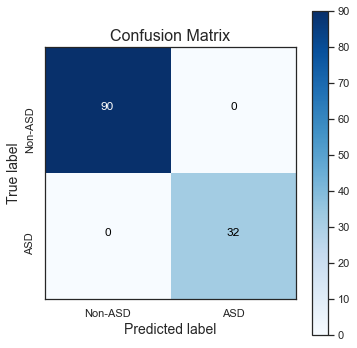

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        32

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

Optimal Threshold: 0.9951

ROC for test dataset 100.0%


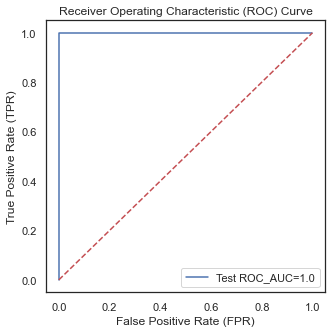


Time required to train the model: 12 seconds
****************************************************************************************************


In [60]:
# Results dataframe and LogisticRegression_KFoldCV_Model
results_df, clf_logreg = classifier_pipelines.LogisticRegression_KFoldCV_Model(X_train, y_train, 
                                                        X_test, y_test, 
                                                        "LogisticRegression_KFoldCV_Model", 
                                                        results_df
                                                    )

###  <font color='darkblue'>5.2. Random Forest Classifier (KFold Cross-Validation) Model

****************************************************************************************************
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.2min finished


****************************************************************************************************
Model Name: RandomForestClassifier_KFoldCV_Model
****************************************************************************************************

Evaluation results from cross-validation and optimal hyperparameters
Best Estimator:
 RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       n_estimators=850, n_jobs=-1, random_state=0,
                       warm_start=True)
Best Cross-Validation Accuracy: 95.270%

Best (Optimal) Parameters:
 {'randomforestclassifier__n_estimators': 850, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__max_depth': 9, 'randomforestclassifier__criterion': 'entropy'}

Optimal hyperparameters:
Best number of trees: 850
Best min_samples_split: 2
Best min_samples_leaf: 2
Best max_features: auto
Best

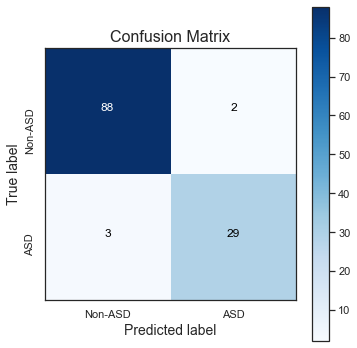

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.94      0.91      0.92        32

    accuracy                           0.96       122
   macro avg       0.95      0.94      0.95       122
weighted avg       0.96      0.96      0.96       122

Optimal Threshold: 0.4706

ROC for test dataset 98.958%


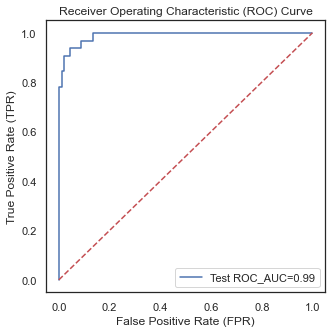


Time required to train the model: 3 minutes
****************************************************************************************************


In [61]:
# Results dataframe and random forest classifier
results_df, clf_rfc = classifier_pipelines.RandomForestClassifier_KFoldCV_Model(X_train, y_train, 
                                                           X_test, y_test, 
                                                           "RandomForestClassifier_KFoldCV_Model", 
                                                           results_df
                                                        )

###  <font color='darkblue'>5.3. XGBoost Classifier (KFold Cross-Validation) Model

****************************************************************************************************
Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.2min finished


****************************************************************************************************
Model Name: XGBoostClassifier_KFoldCV_Model
****************************************************************************************************

Evaluation results from cross-validation and optimal hyperparameters
Best Estimator:
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1,

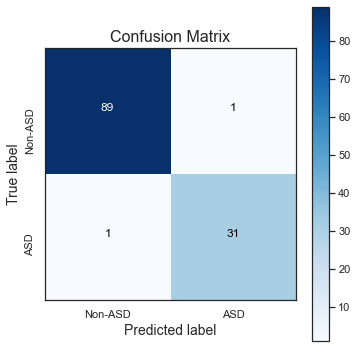

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.97      0.97      0.97        32

    accuracy                           0.98       122
   macro avg       0.98      0.98      0.98       122
weighted avg       0.98      0.98      0.98       122

Optimal Threshold: 0.5133

ROC for test dataset 99.792%


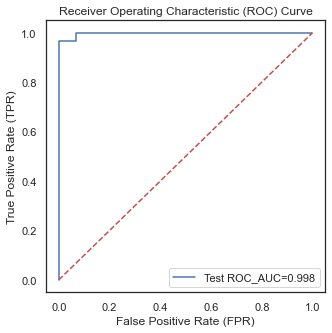


Time required to train the model: 1 minutes
****************************************************************************************************


In [62]:
# Results dataframe and XGBoost classifier
results_df, clf_xgb = classifier_pipelines.XGBoostClassifier_KFoldCV_Model(X_train, y_train, 
                                                      X_test, y_test, 
                                                      "XGBoostClassifier_KFoldCV_Model", 
                                                      results_df
                                                    )

###  <font color='darkblue'>5.4. KNeighborsClassifier (KFold Cross-Validation) Model

****************************************************************************************************
Fitting 5 folds for each of 47 candidates, totalling 235 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 235 out of 235 | elapsed:    3.8s finished


****************************************************************************************************
Model Name: KNeighborsClassifier_KFoldCV_Model
****************************************************************************************************

Evaluation results from cross-validation and optimal hyperparameters
Best Estimator:
 KNeighborsClassifier(n_jobs=-1, n_neighbors=49)
Best Cross-Validation Accuracy: 94.239%

Best (Optimal) Parameters:
 {'kneighborsclassifier__n_neighbors': 49}

Optimal hyperparameters:
Best n_neighbors (K): 49
****************************************************************************************************

Prediction and Evaluation results: On Actual TEST SET

Test ROC_AUC: 99.010%
Test Accuracy: 95.902%

Confusion Matrix
 Model Stats Scores Summary : 


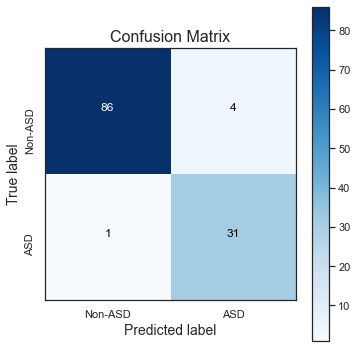

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        90
           1       0.89      0.97      0.93        32

    accuracy                           0.96       122
   macro avg       0.94      0.96      0.95       122
weighted avg       0.96      0.96      0.96       122

Optimal Threshold: 0.6327

ROC for test dataset 99.01%


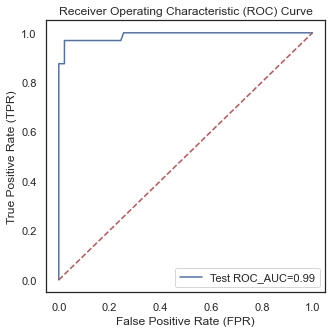


Time required to train the model: 5 seconds
****************************************************************************************************


In [63]:
# Results dataframe and KNeighborsClassifier
results_df, clf_knn = classifier_pipelines.KNeighborsClassifier_KFoldCV_Model(X_train, y_train, 
                                                        X_test, y_test, 
                                                        "KNeighborsClassifier_KFoldCV_Model", 
                                                        results_df
                                                    )

# <font color='blue'>Step 6
## <font color='purple'>6.1. Model Evaluation Results

In [64]:
# Final results dataframe
results_df

,Model,Cross-Validation Accuracy,Test Accuracy,ROC_AUC_Test,Threshold,Precision,Recall,F1 Score
0,LogisticRegression_KFoldCV_Model,100.000%,100.000%,100.000%,0.9951,100.000%,100.000%,100.000%
1,RandomForestClassifier_KFoldCV_Model,95.270%,95.902%,98.958%,0.4706,93.548%,90.625%,92.063%
2,XGBoostClassifier_KFoldCV_Model,97.528%,98.361%,99.792%,0.5133,96.875%,96.875%,96.875%
3,KNeighborsClassifier_KFoldCV_Model,94.239%,95.902%,99.010%,0.6327,88.571%,96.875%,92.537%


**Observation:**<br>
The `LogisticRegression_KFoldCV_Model` outperformed all other model by achieving the following evaluation metric scores on the test dataset:

- <pre>Cross-Validation Accuracy : 100%</pre>
- <pre>Test Accuracy             : 100%</pre>
- <pre>ROC_AUC score (Test)      : 100%</pre>
- <pre>Threshold                 : 0.9951</pre>
- <pre>Precision                 : 100%</pre>
- <pre>Recall                    : 100%</pre>
- <pre>F1-Score                  : 100%</pre>

#### <font color='darkblue'>6.2. Exporting `'results_df'` dataframe to a csv file

In [65]:
# Exporting the 'results' dataframe to a csv file
results_df.to_csv("results.csv", index=False)

#### <font color='darkblue'>*** 6.3. Saving the best model to disk

In [66]:
# Saving the best model to disk
filename = 'ASD_classifier.sav'
filepath = os.path.normpath(os.path.join(r"./Saved Model", filename))
pickle.dump(clf_logreg, open(filepath, 'wb'))   # Serializing an object before dumping it as a file (Python obj -> binary)

#### <font color='darkblue'> (Uncomment) - *** 6.4. To load the model from disk

In [67]:
# # (Uncomment) - To load the model from disk
# loaded_model = pickle.load(open(filepath, 'rb'))    # Deserializing the objected and loading it
# result = loaded_model.score(X_test, y_test)
# print(result)

# <font color='green'>Conclusion

- *The **Logistic Regression with K-Fold Cross-Validation model**, known as the `'LogisticRegression_KFoldCV_Model'`, has shown **outstanding performance** on this particular dataset for **detecting ASD in screening test-takers**. It can be considered as the `top choice amongst the selection of models for this binary classification task.`*
- *This highly efficient model obtained an **accuracy of 100% on the test dataset**, with a **ROC_AUC Score of 100% and a cut-off threshold of 0.9951**. It's worth mentioning that **precision, recall and F1-Score all obtained 100% scores on the test dataset**.*
- *The classifier heavily relies on the demographic information and answers to the 10 question questionnaire, therefore, incorporating it into an Autistic Spectrum Disorder (ASD) Screening app could greatly benefit individuals, families, and society by providing timely support.*